<a href="https://colab.research.google.com/github/suryautharakumar/CMP7005_Programming_for_Data_Analysis/blob/main/Final_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
!pip install ghapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 3.3 MB/s eta 0:00:00


In [29]:
from ghapi.all import GhApi
import pandas as pd

api = GhApi()

user = "suryautharakumar"
repo = "CMP7005_Programming_for_Data_Analysis"
folder = "Assessment_Data"

files = api.repos.get_content(user, repo, folder)

csv_urls = [
    f.download_url for f in files
    if f.download_url.endswith(".csv")
]

all_cities_data = []

for url in csv_urls:
    df_city = pd.read_csv(url)
    all_cities_data.append(df_city)
    print("Loaded:", url)
combined_data = pd.concat(all_cities_data, ignore_index=True)
combined_data.to_csv("all_cities_combined.csv", index=False)

print("SUCCESS: Combined files saved as all_cities_combined.csv")

/usr/local/lib/python3.12/dist-packages/ghapi/core.py:114: UserWarning: Neither GITHUB_TOKEN nor GITHUB_JWT_TOKEN found: running as unauthenticated
  else: warn('Neither GITHUB_TOKEN nor GITHUB_JWT_TOKEN found: running as unauthenticated')


Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Ahmedabad_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Aizawl_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Amaravati_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Amritsar_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Bengaluru_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Bhopal_data.csv
Loaded: https://raw.githubusercontent.com/suryautharakumar/CMP7005_Programming_for_Data_Analysis/main/Assessment_Data/Brajrajnagar_data.csv
Loaded: https://raw.githubusercontent.com/sur

In [30]:
df= pd.read_csv('all_cities_combined.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27/06/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/06/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/06/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/06/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [31]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [32]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27/06/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/06/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/06/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/06/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01/07/2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [33]:
df.shape
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}')

No of Rows: 29531, No of Columns: 16


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [35]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [36]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [37]:
cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
cities

Total number of cities in the dataset : 26


,count
City,
Ahmedabad,2009
Bengaluru,2009
Chennai,2009
Mumbai,2009
Lucknow,2009
Delhi,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [38]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [39]:
print(f"There are '{df.duplicated().sum()}' duplicates in the dataset")

There are '0' duplicates in the dataset


In [40]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

missing_values = missing_values_table(df)
display(missing_values.style.background_gradient(cmap='Greens'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


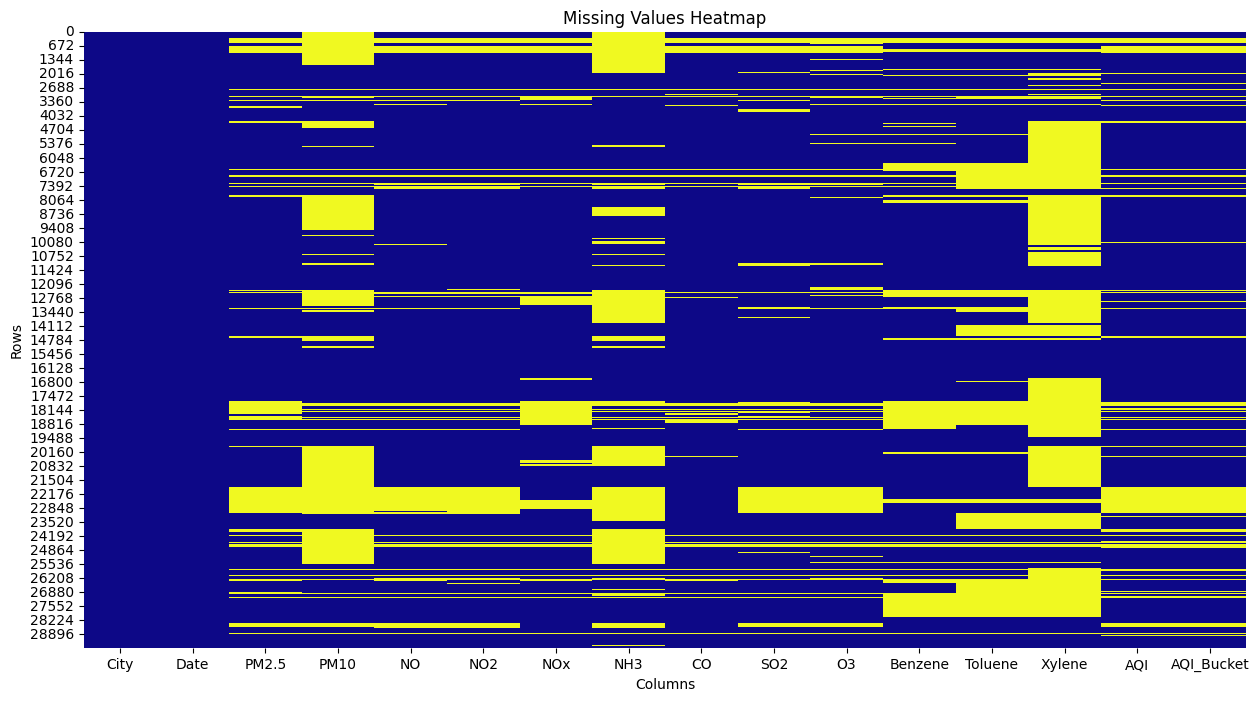

In [41]:
# Visualize the missing values using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='plasma')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [42]:
missing_values_per_cities = df.groupby('City').apply(lambda x: x.isnull().sum())
missing_values_per_cities

/tmp/ipython-input-3208573697.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_values_per_cities = df.groupby('City').apply(lambda x: x.isnull().sum())


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,,
Ahmedabad,0,0,628,1602,609,608,594,2009,609,640,685,483,483,484,675,675
Aizawl,0,0,2,1,0,0,0,0,0,0,9,15,15,113,2,2
Amaravati,0,0,59,55,55,55,55,55,97,65,55,75,75,269,110,110
Amritsar,0,0,128,63,93,44,289,42,76,168,115,195,212,213,95,95
Bengaluru,0,0,146,360,6,6,4,203,11,6,144,266,93,2009,99,99
Bhopal,0,0,9,9,9,9,9,9,9,9,9,289,289,289,11,11
Brajrajnagar,0,0,185,173,243,234,175,226,150,193,203,173,938,938,225,225
Chandigarh,0,0,15,0,4,4,4,10,0,0,0,0,0,0,5,5
Chennai,0,0,117,1707,36,36,36,462,25,36,49,285,253,2009,125,125


In [43]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             10784
Aizawl                  159
Amaravati              1190
Amritsar               1828
Bengaluru              3452
Bhopal                  970
Brajrajnagar           4281
Chandigarh               47
Chennai                5301
Coimbatore              693
Delhi                  1087
Ernakulam               275
Gurugram               6843
Guwahati               1033
Hyderabad              1583
Jaipur                 1416
Jorapokhar             8603
Kochi                   356
Kolkata                 816
Lucknow                6082
Mumbai                14201
Patna                  6214
Shillong               1073
Talcher                4014
Thiruvananthapuram     3805
Visakhapatnam          2382
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


Data Cleaning

In [44]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [45]:
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']] = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].ffill()

In [46]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,27
PM10,1594
NO,0
NO2,0
NOx,0
NH3,2009
CO,0
SO2,0


In [47]:
df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']] = df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']].bfill()

In [48]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [49]:
print("Total missing values per City:")
print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))

Total missing values per City:
City
Ahmedabad             0
Aizawl                0
Amaravati             0
Amritsar              0
Bengaluru             0
Bhopal                0
Brajrajnagar          0
Chandigarh            0
Chennai               0
Coimbatore            0
Delhi                 0
Ernakulam             0
Gurugram              0
Guwahati              0
Hyderabad             0
Jaipur                0
Jorapokhar            0
Kochi                 0
Kolkata               0
Lucknow               0
Mumbai                0
Patna                 0
Shillong              0
Talcher               0
Thiruvananthapuram    0
Visakhapatnam         0
dtype: int64


/tmp/ipython-input-2279394426.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('City').apply(lambda x: x.isnull().sum().sum()))


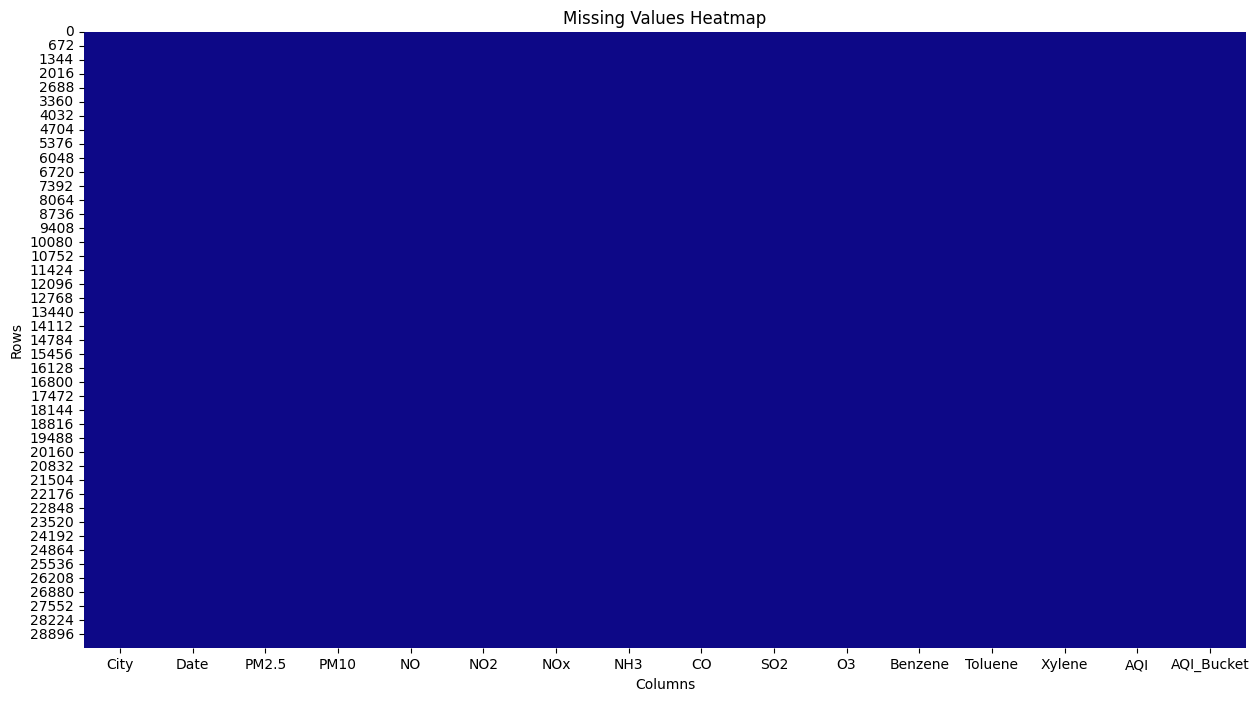

In [50]:
# Visualize the missing values using a heatmap after cleaning
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='plasma')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,66.137399,64.101785,0.04,29.19,46.90,78.620,949.99
PM10,29531.0,97.578733,84.860683,0.01,31.58,72.38,138.605,1000.00
NO,29531.0,17.201890,23.245966,0.02,5.90,9.28,18.560,390.68
NO2,29531.0,26.909513,23.671982,0.01,11.63,19.72,35.030,362.21
NOx,29531.0,32.611069,33.829601,0.00,13.18,21.98,38.660,467.63
NH3,29531.0,22.650619,25.794354,0.01,8.68,15.15,26.640,352.89
CO,29531.0,2.292734,6.824266,0.00,0.50,0.91,1.490,175.81
SO2,29531.0,15.650236,20.583528,0.01,5.74,8.95,15.840,193.86
O3,29531.0,34.130603,21.631257,0.01,18.86,31.48,44.215,257.73
Benzene,29531.0,3.130408,15.988058,0.00,0.05,0.67,2.750,455.03


EDA

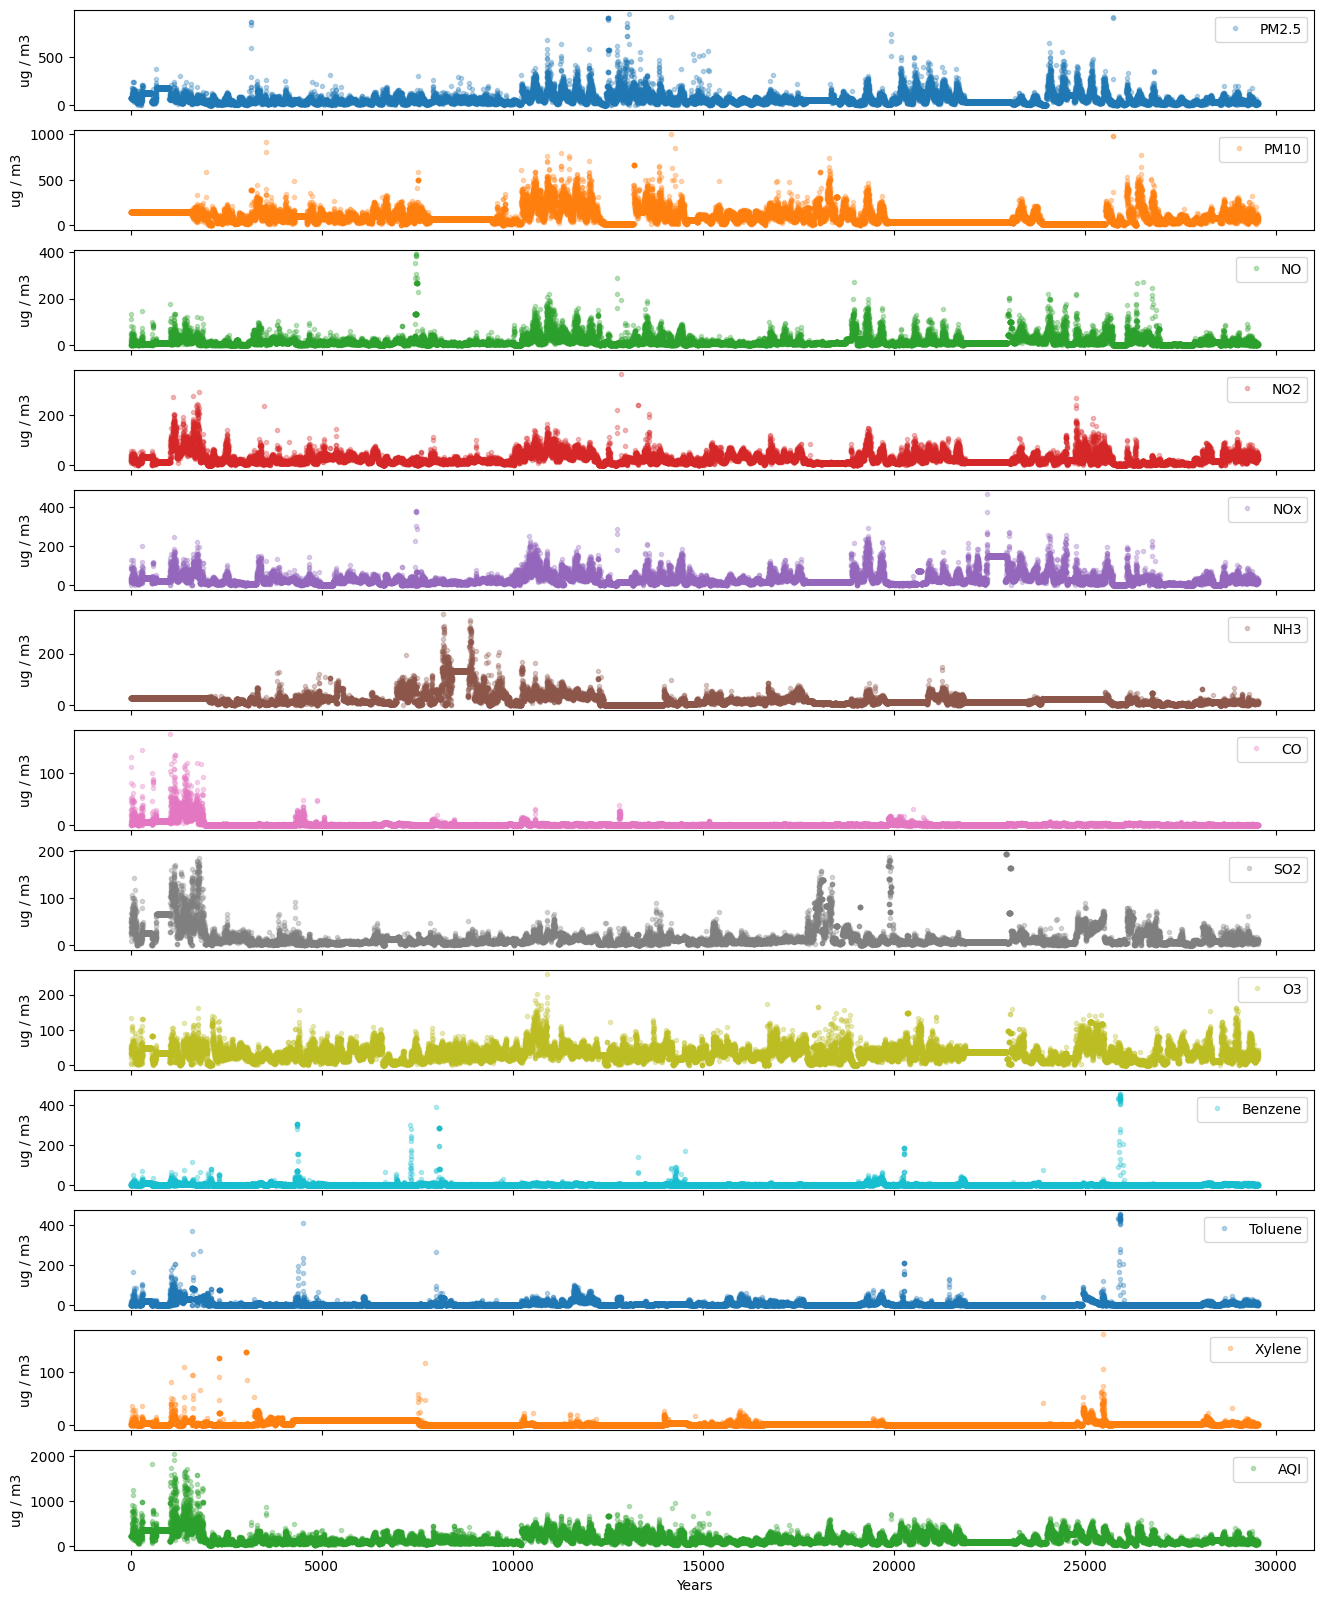

In [52]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']
axes = df[pollutants].plot(marker='.', alpha=0.3, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')        # plots shows variations of different parameters

In [53]:
city_stats = df.groupby('City')[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']].mean().reset_index()

import plotly.express as px

# Melt the DataFrame to create a 'Pollutant' column
city_stats_melted = pd.melt(city_stats,
                               id_vars=['City'],
                               value_vars=['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene'],
                               var_name='Pollutant',
                               value_name='Average Concentration')

# Create the stacked bar chart
fig_station = px.bar(city_stats_melted,
                     y='City',  # Move City to the y-axis
                     x='Average Concentration',  # Move Average Concentration to the x-axis
                     color='Pollutant',  # Use 'Pollutant' for color differentiation
                     title='Average Pollution Levels by Station (Vertical Stacked)',
                     labels={'City': 'Cities', 'Average Concentration': 'Average Concentration'},
                     barmode='stack')  # Keep the stacking behavior
fig_station.update_layout(
    height=800,  # Adjust height for better visibility
)

fig_station.show()

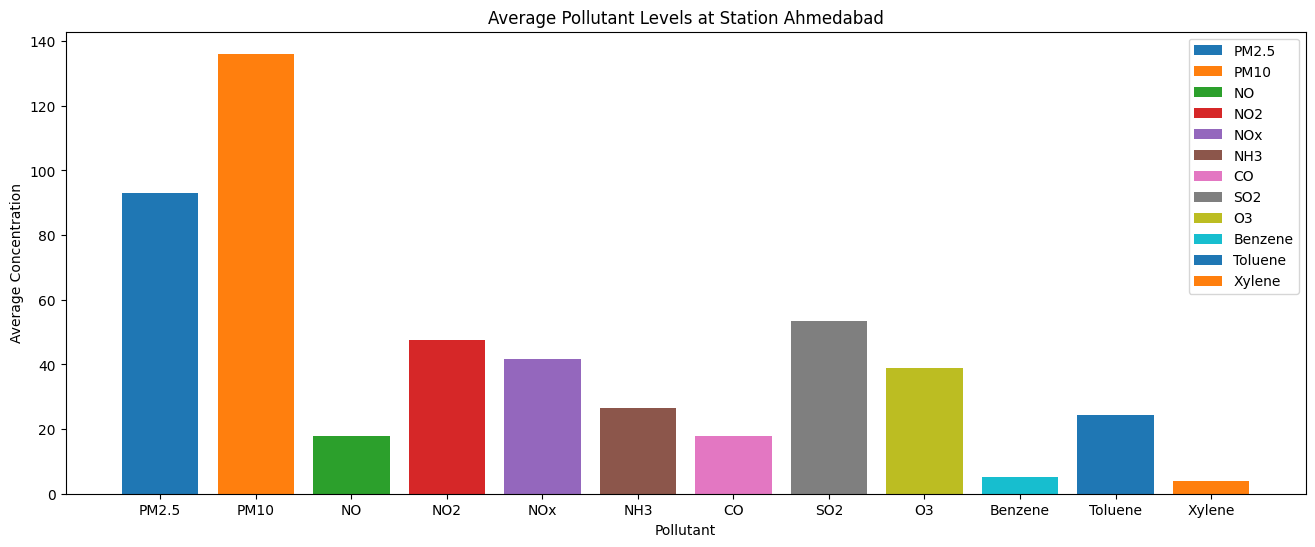

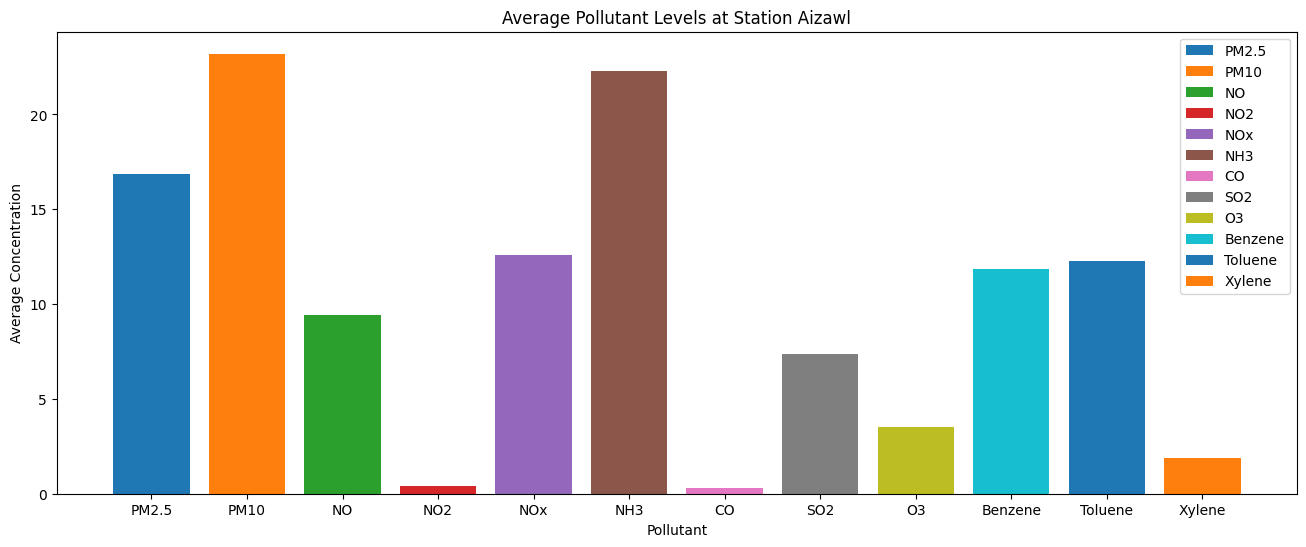

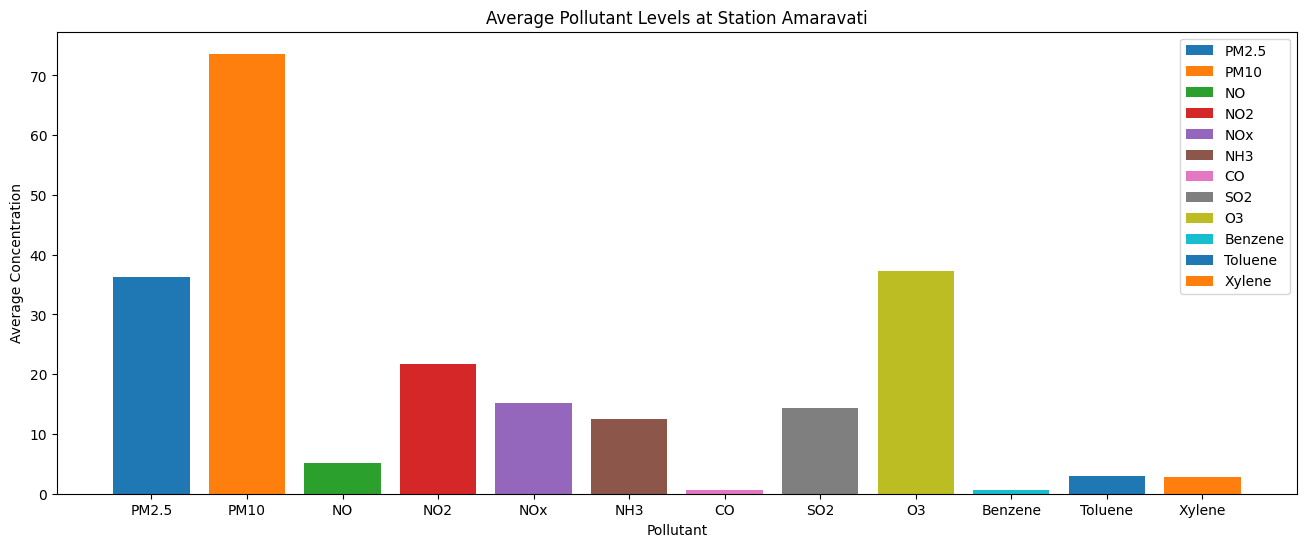

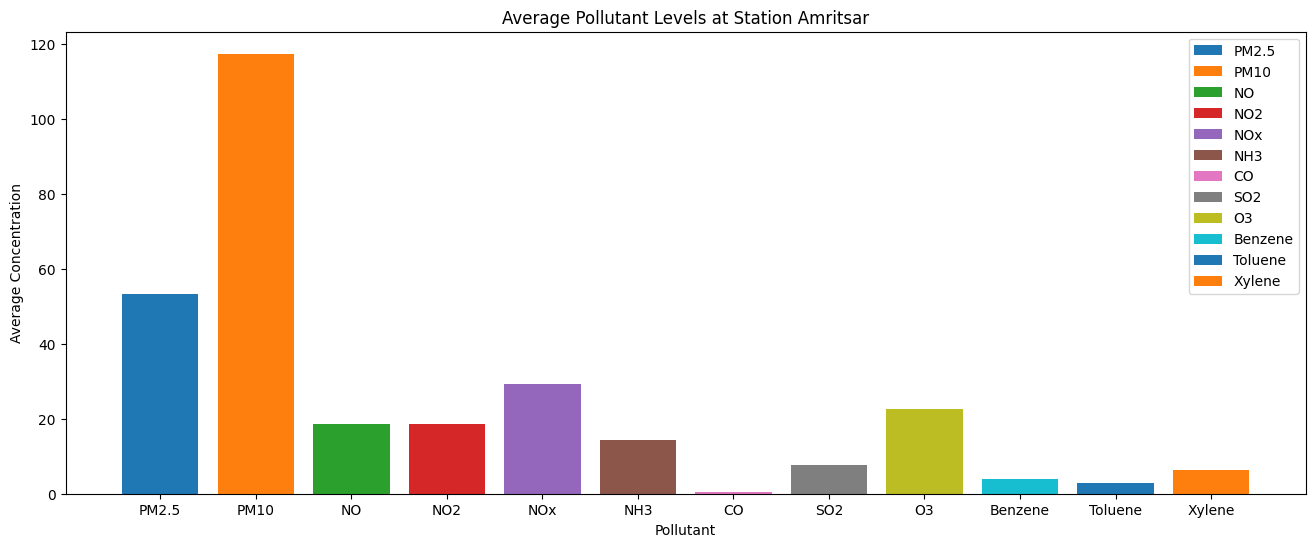

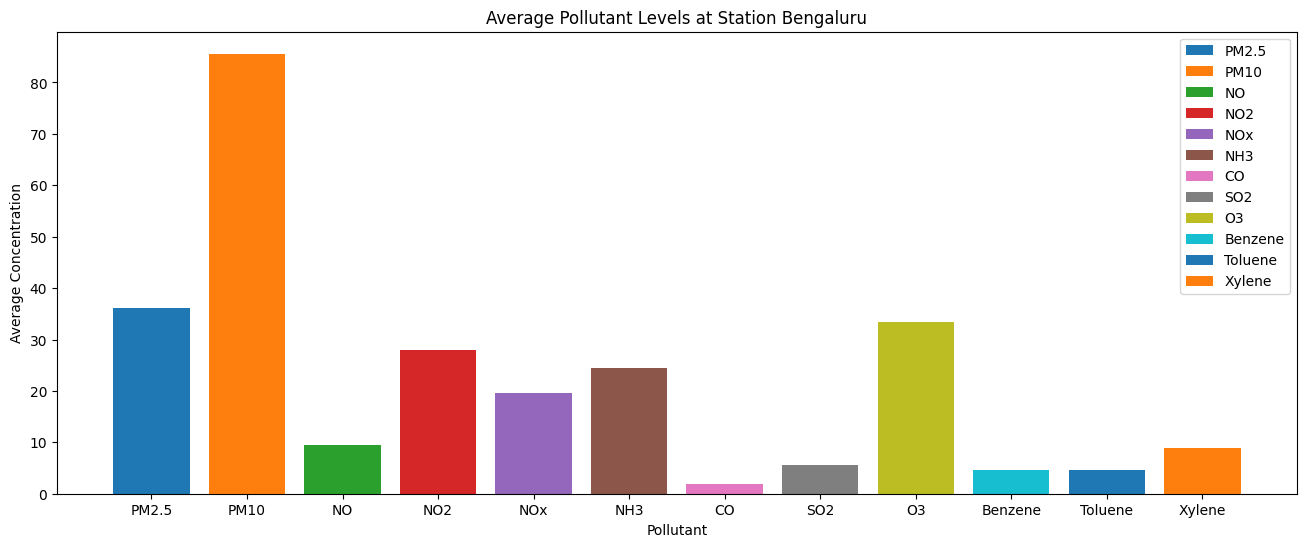

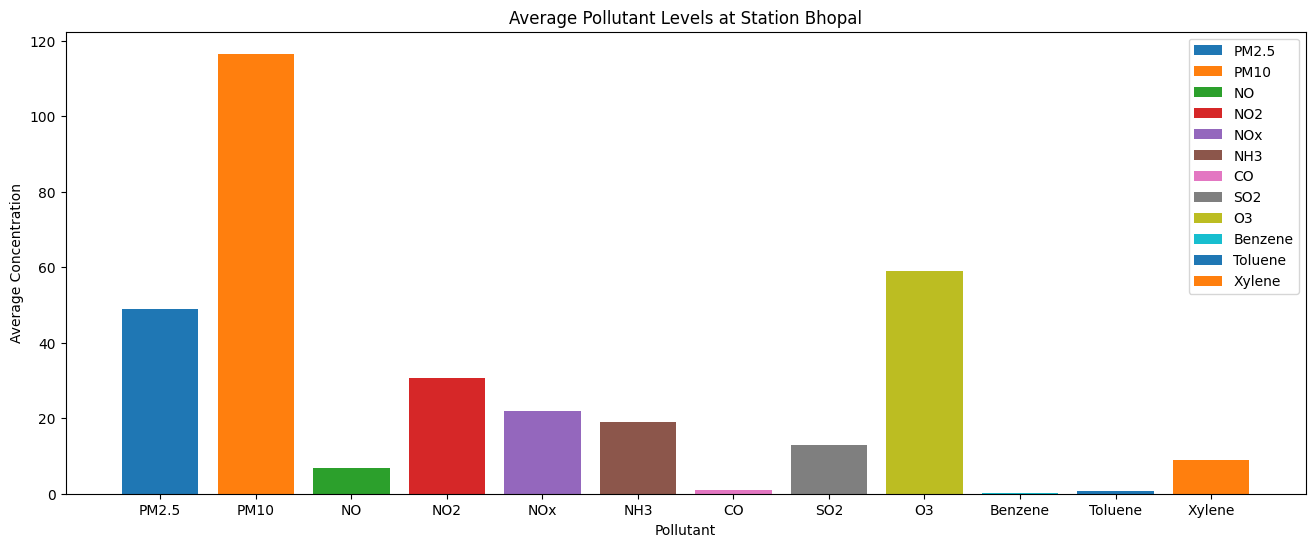

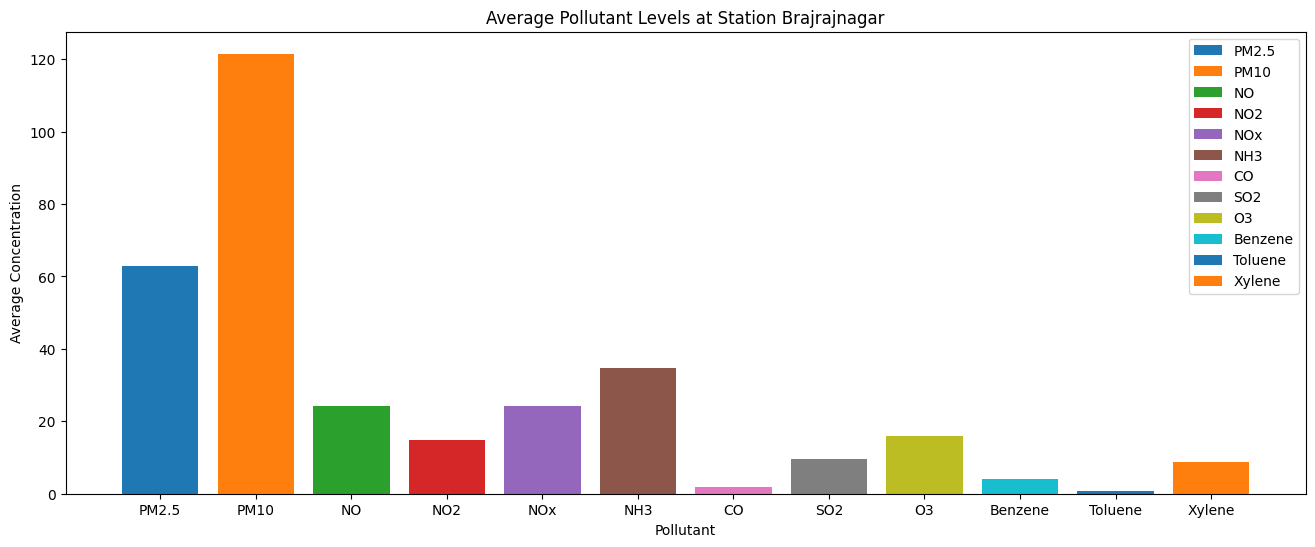

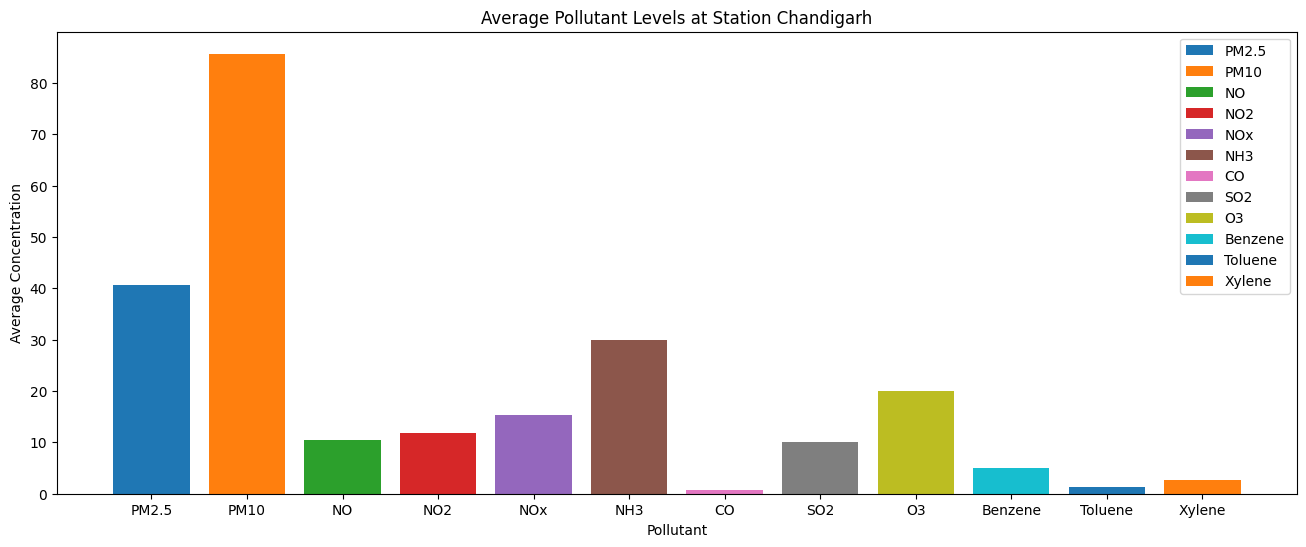

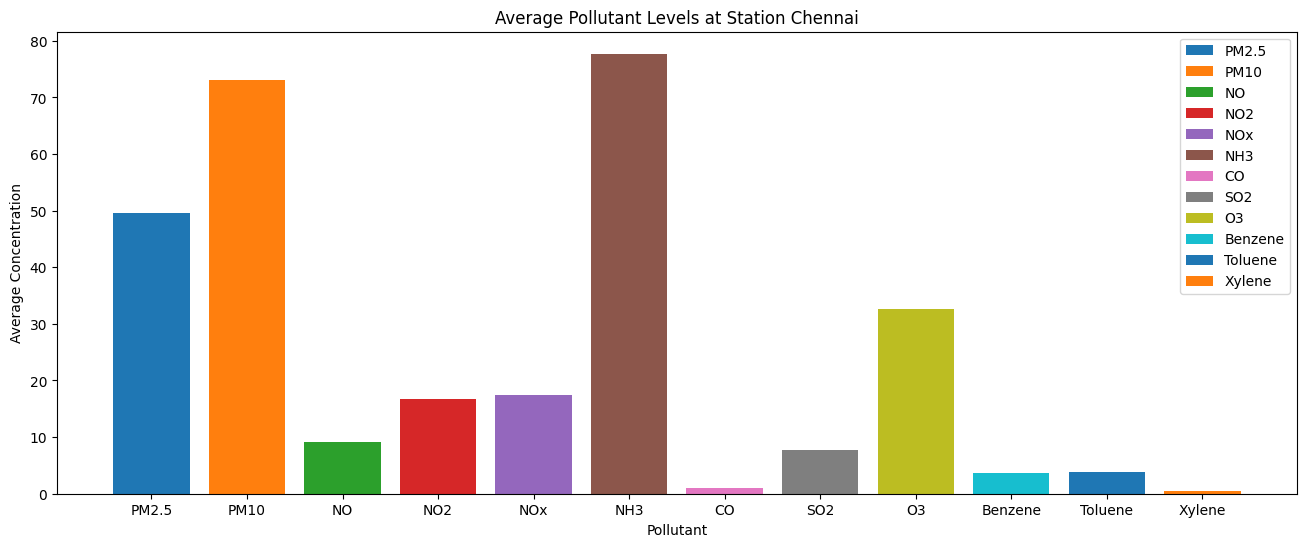

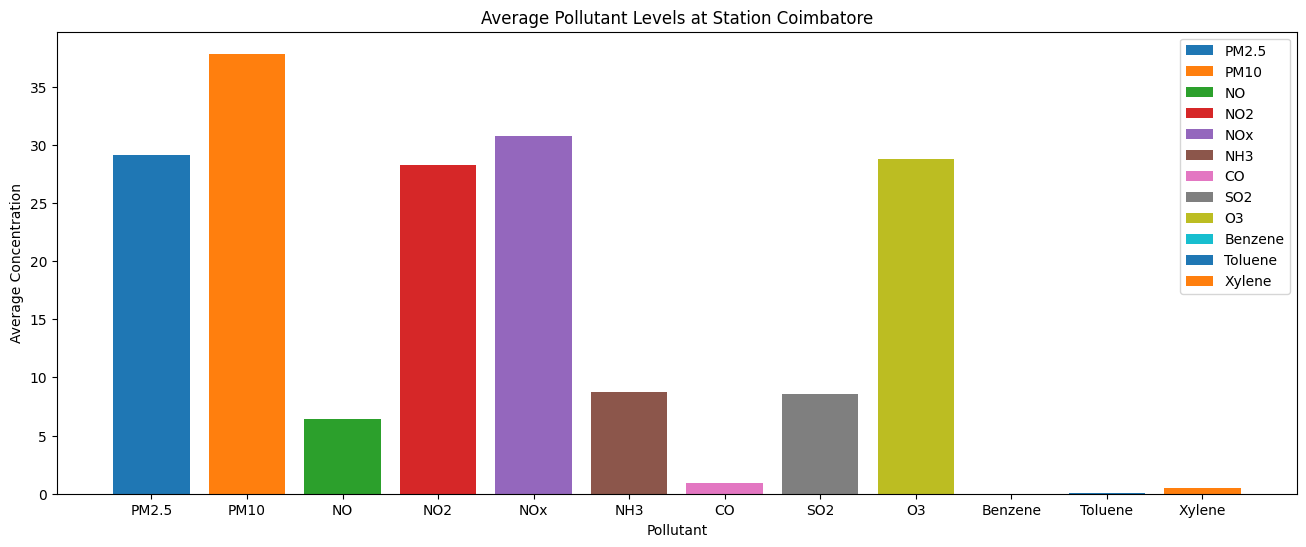

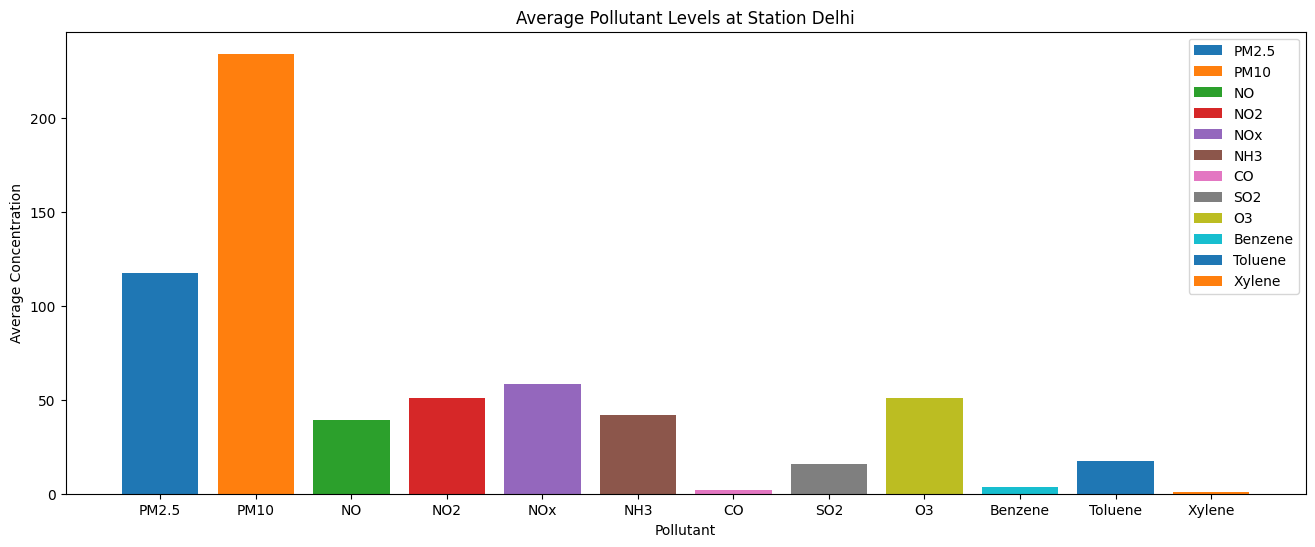

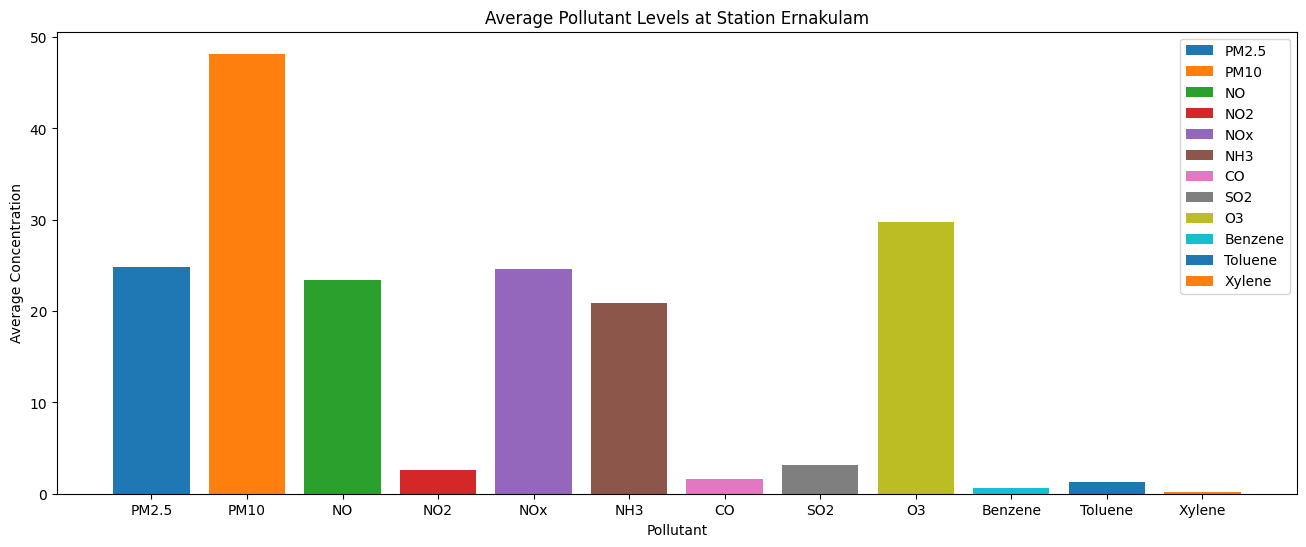

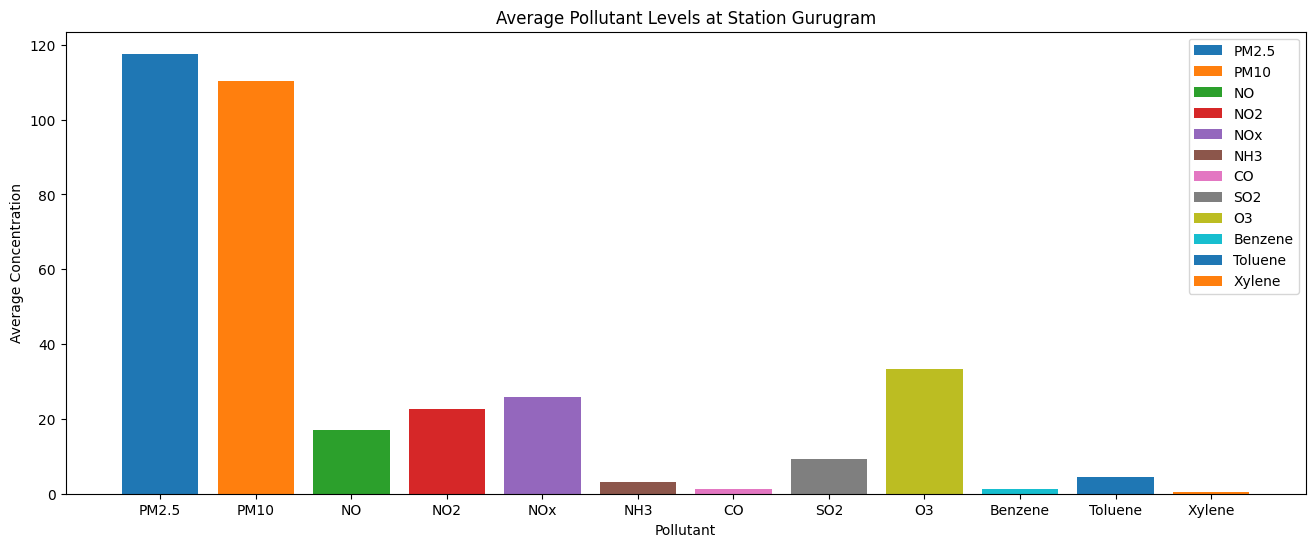

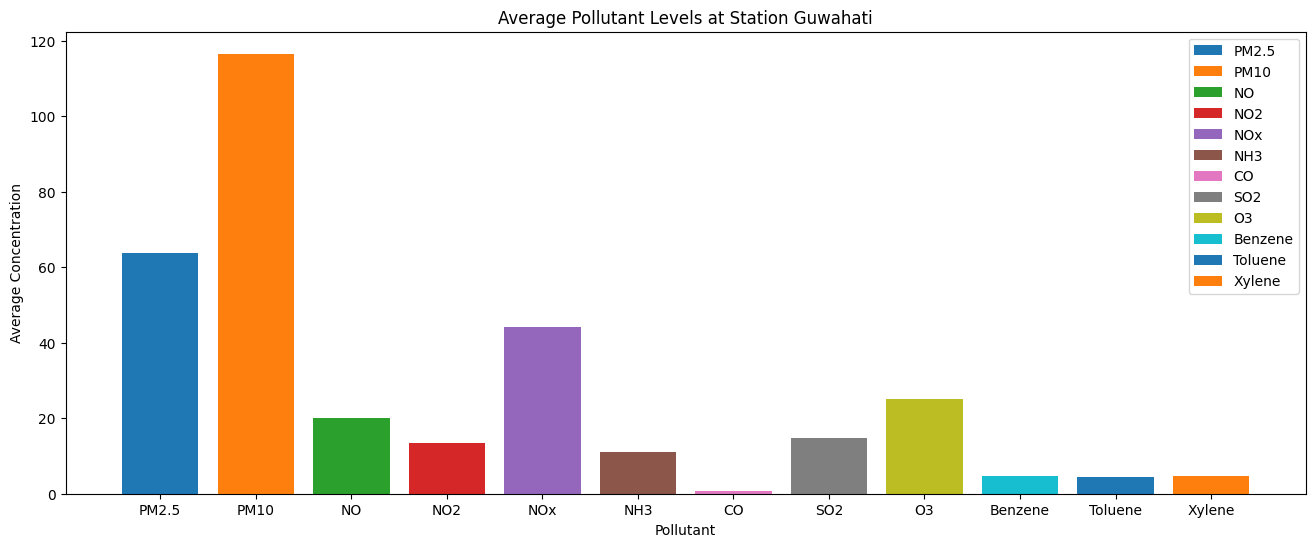

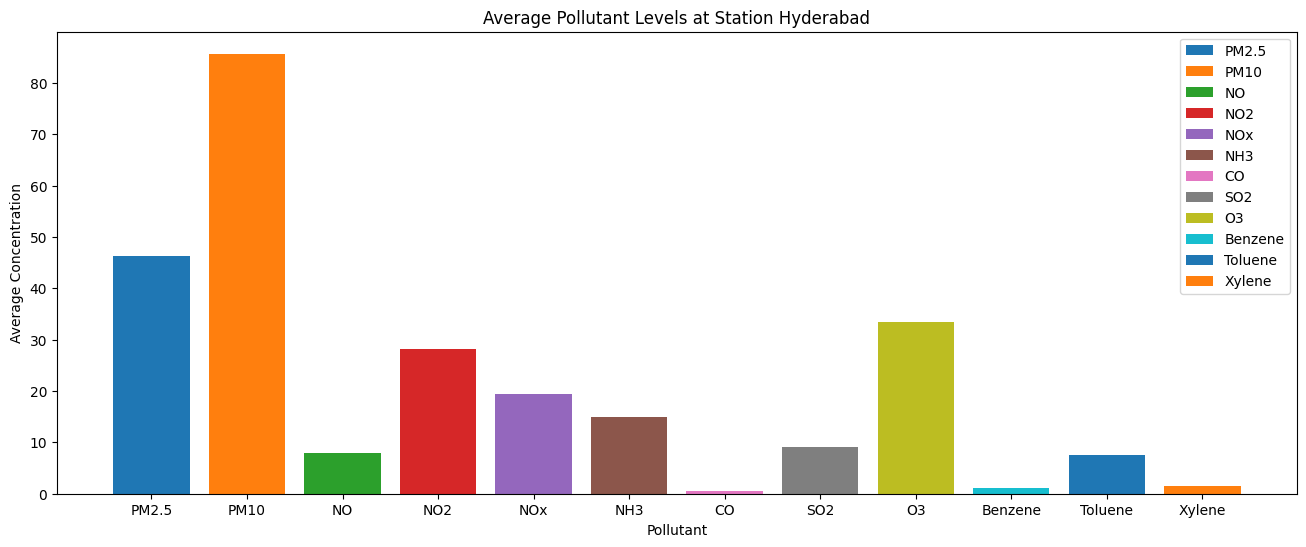

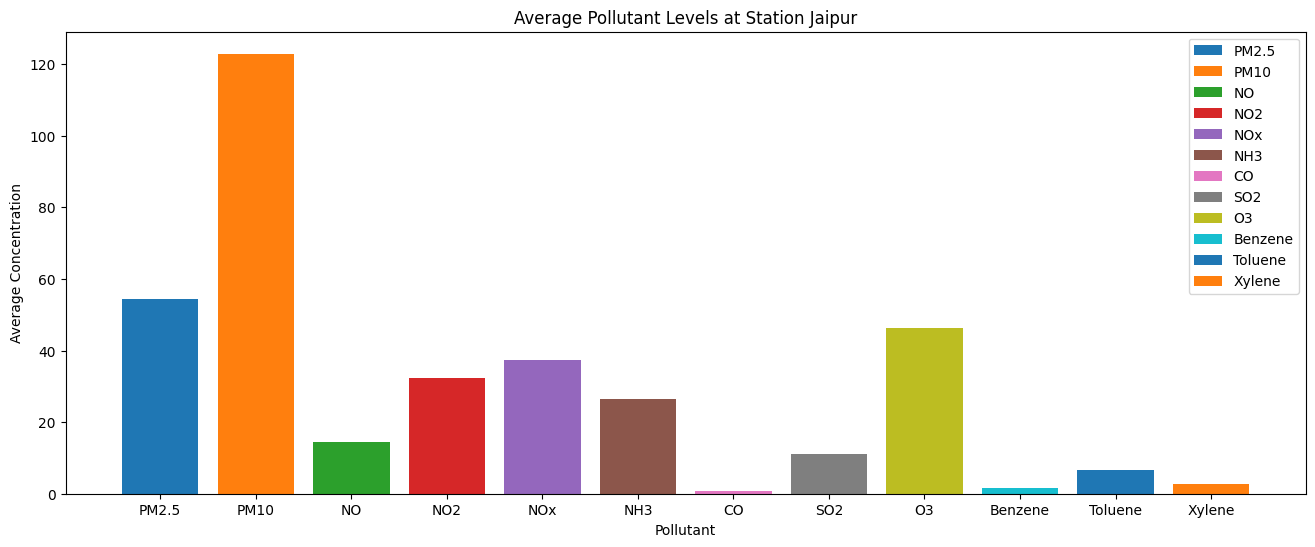

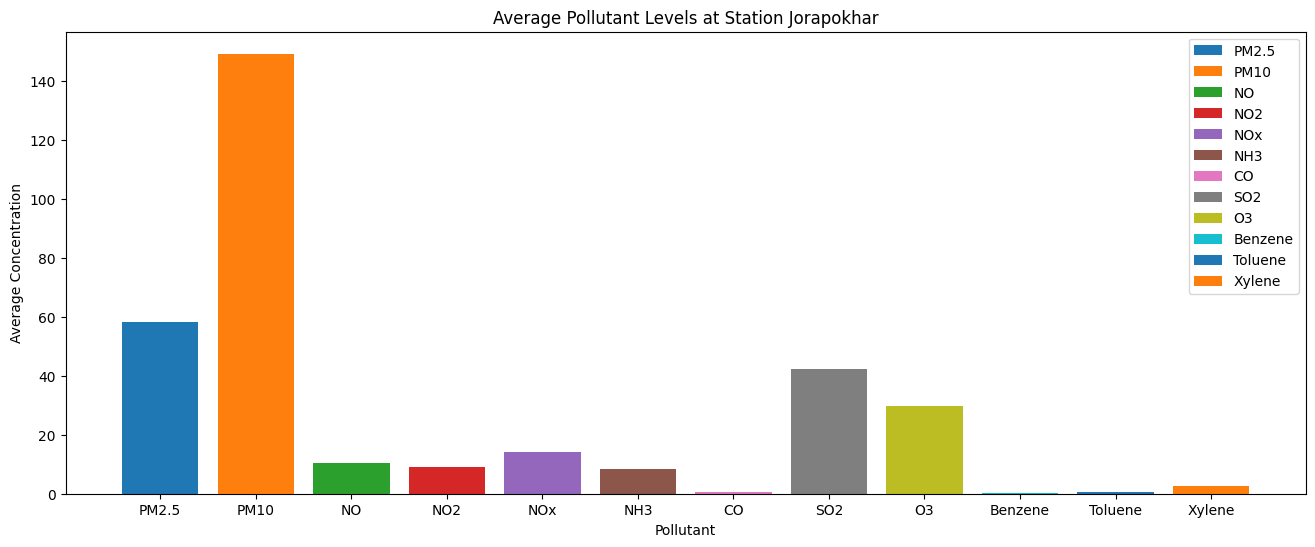

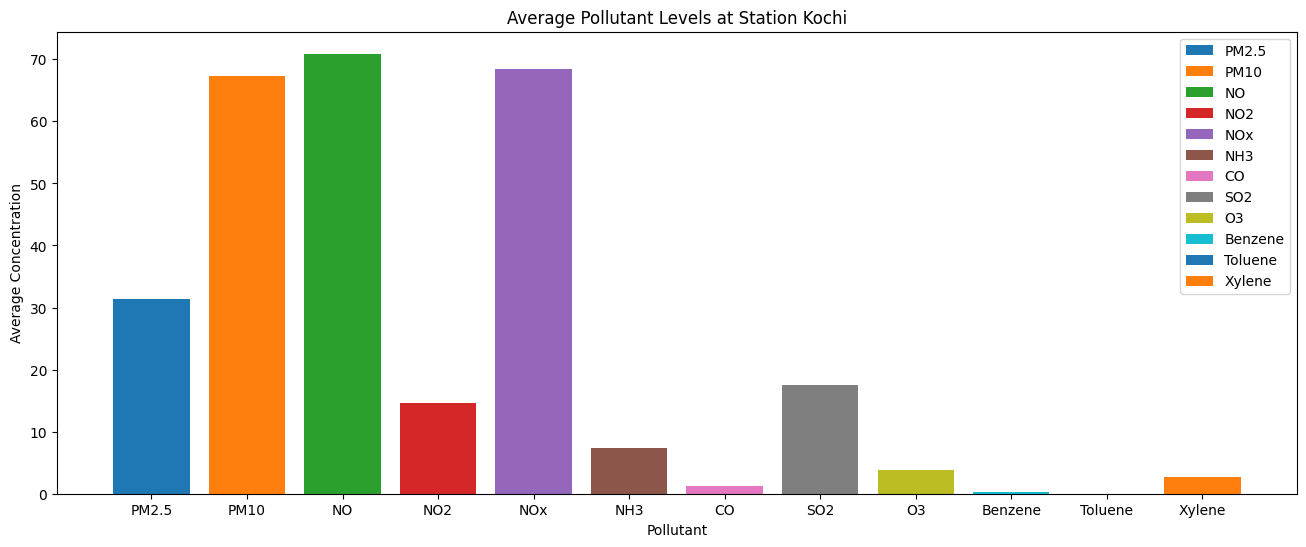

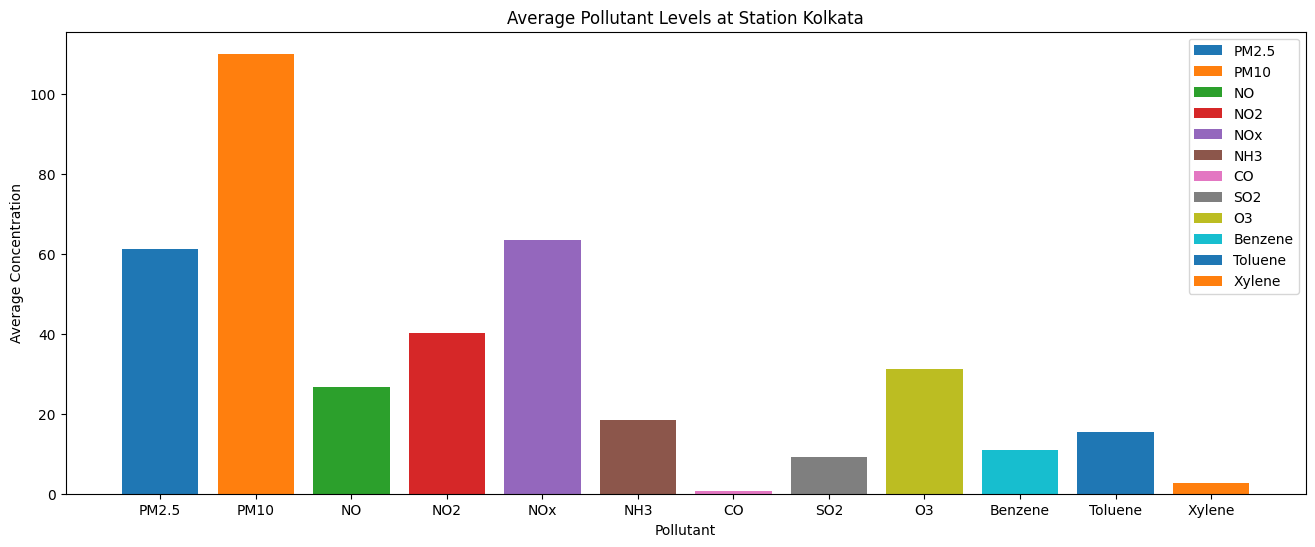

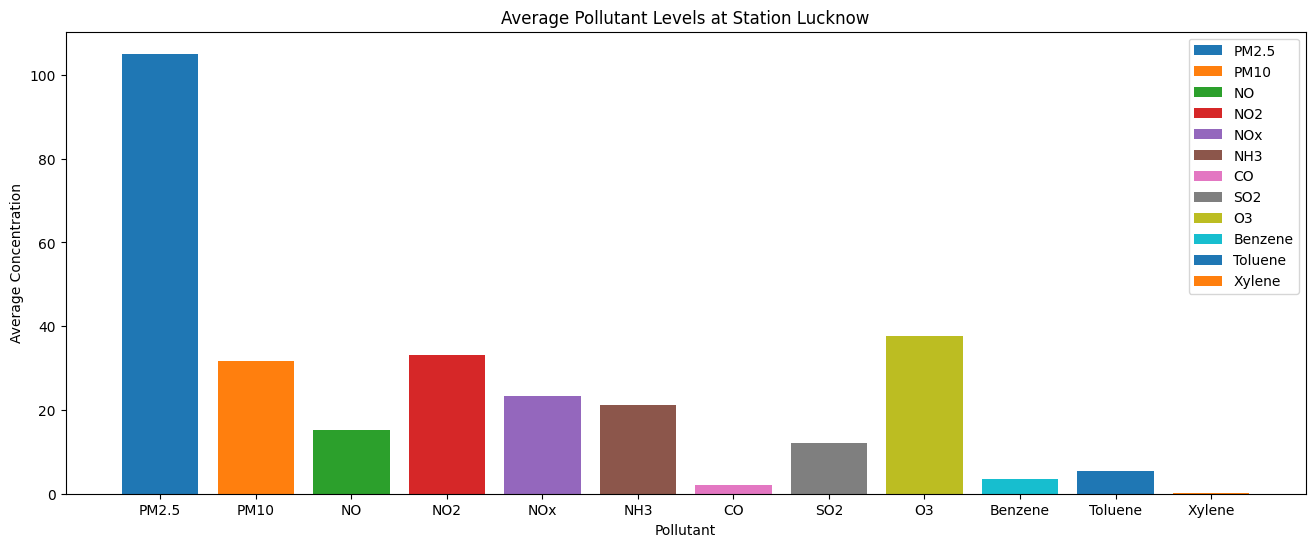

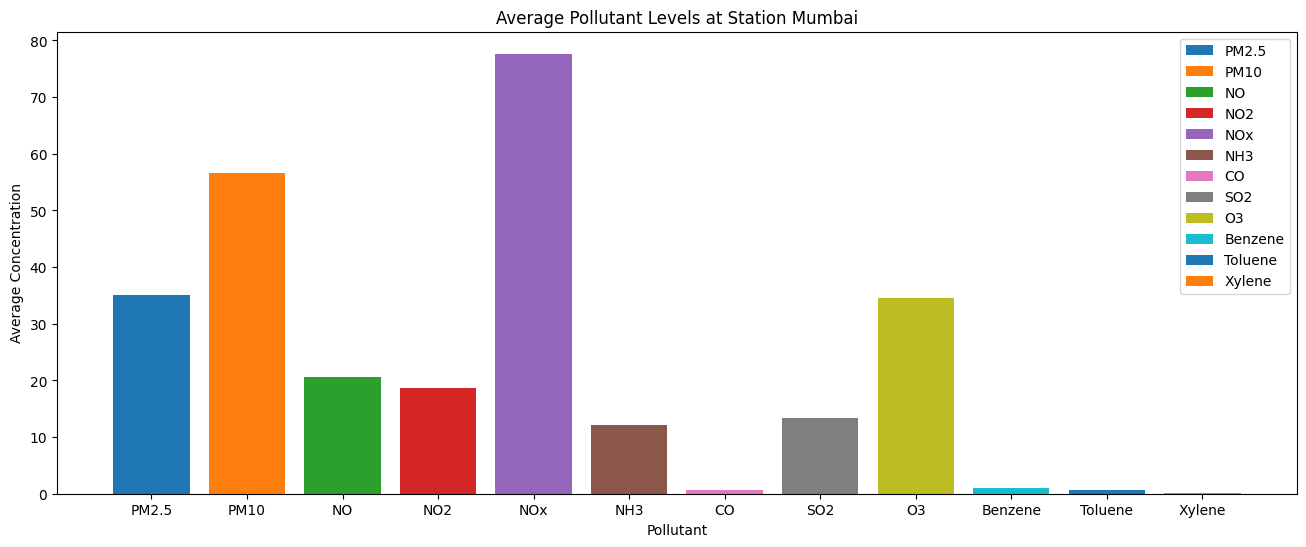

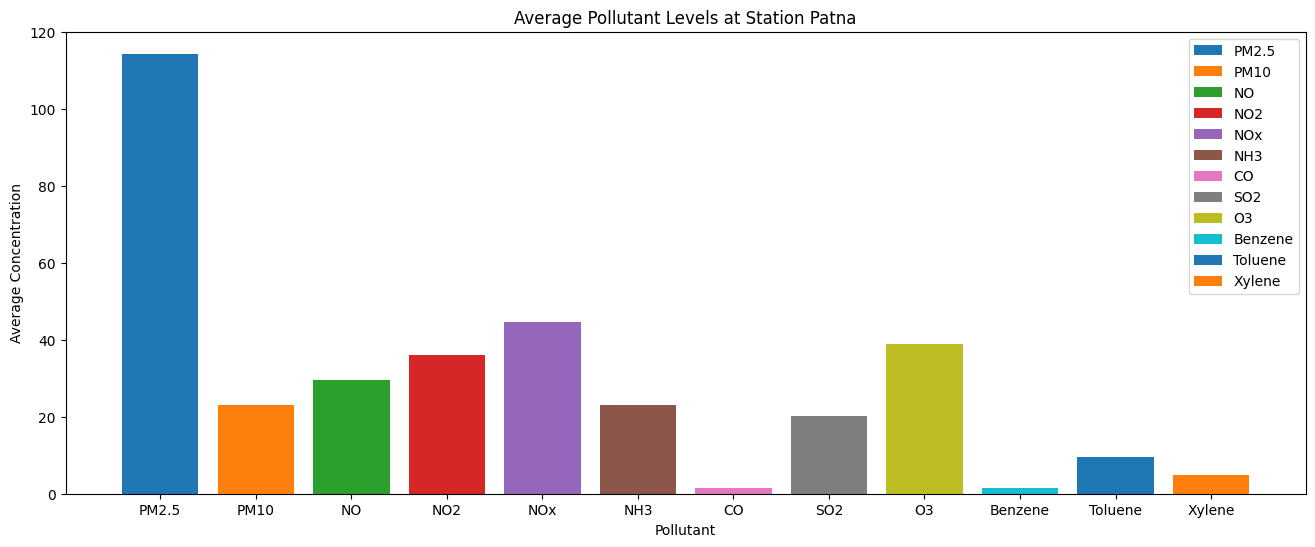

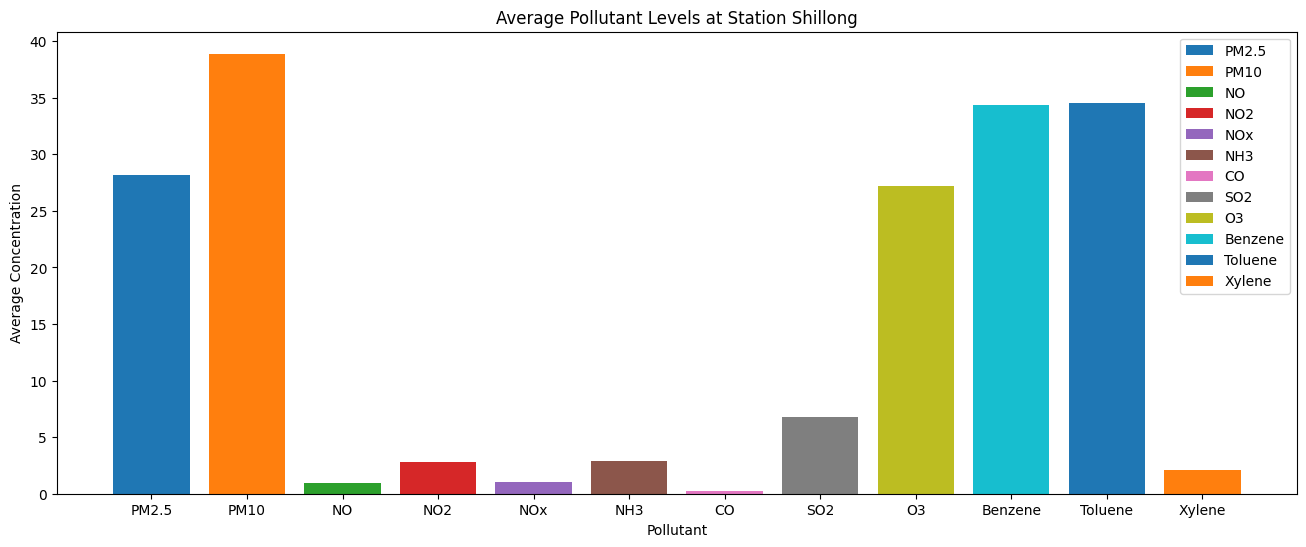

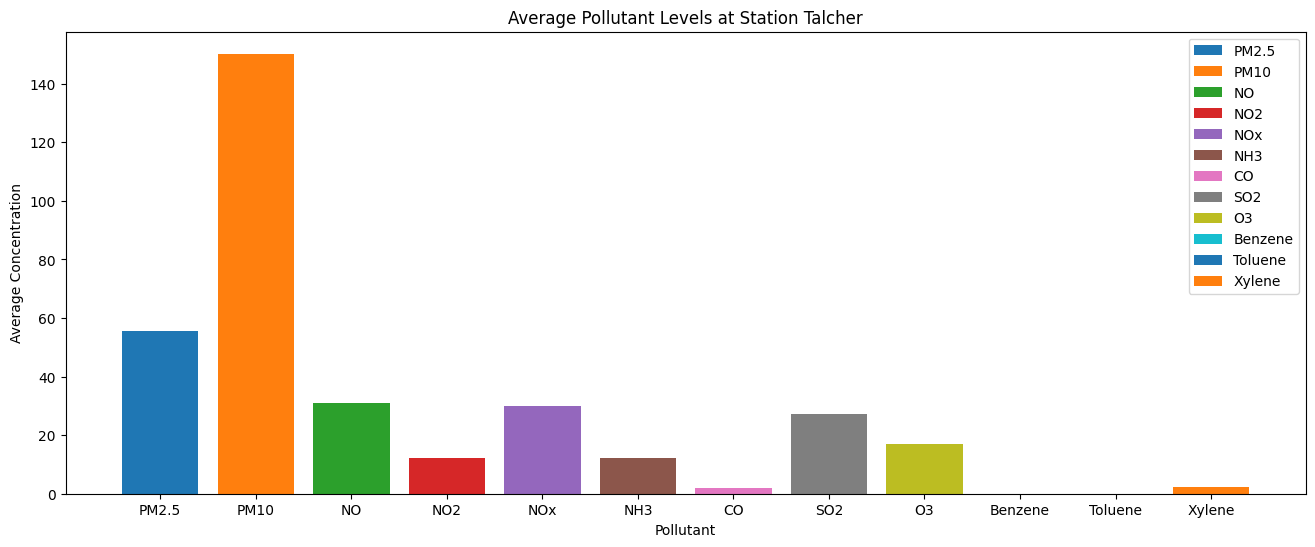

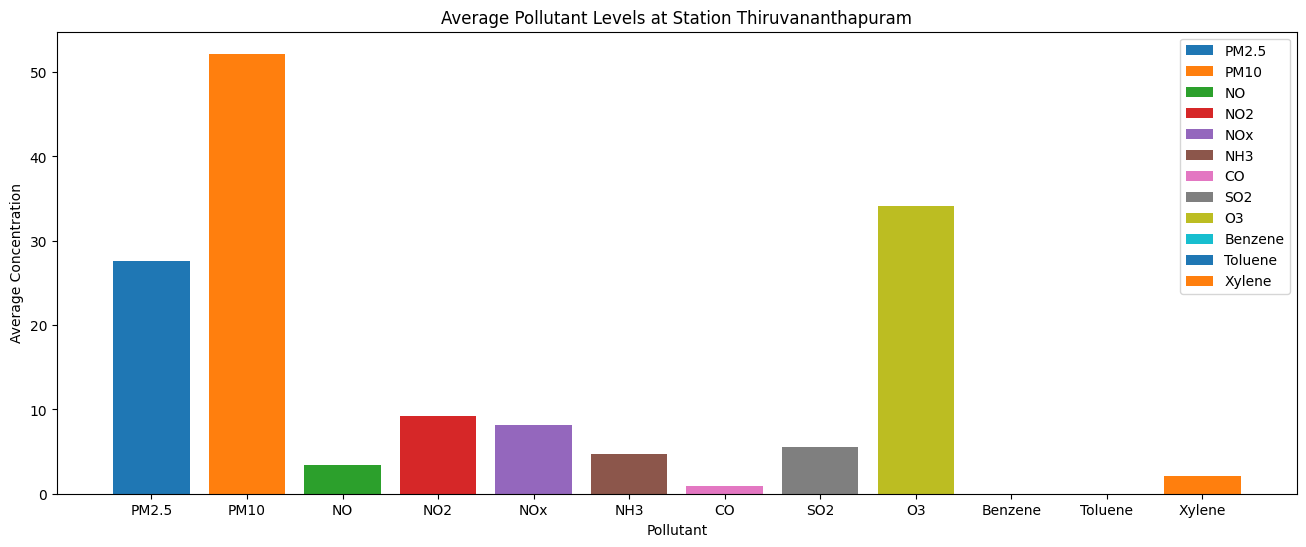

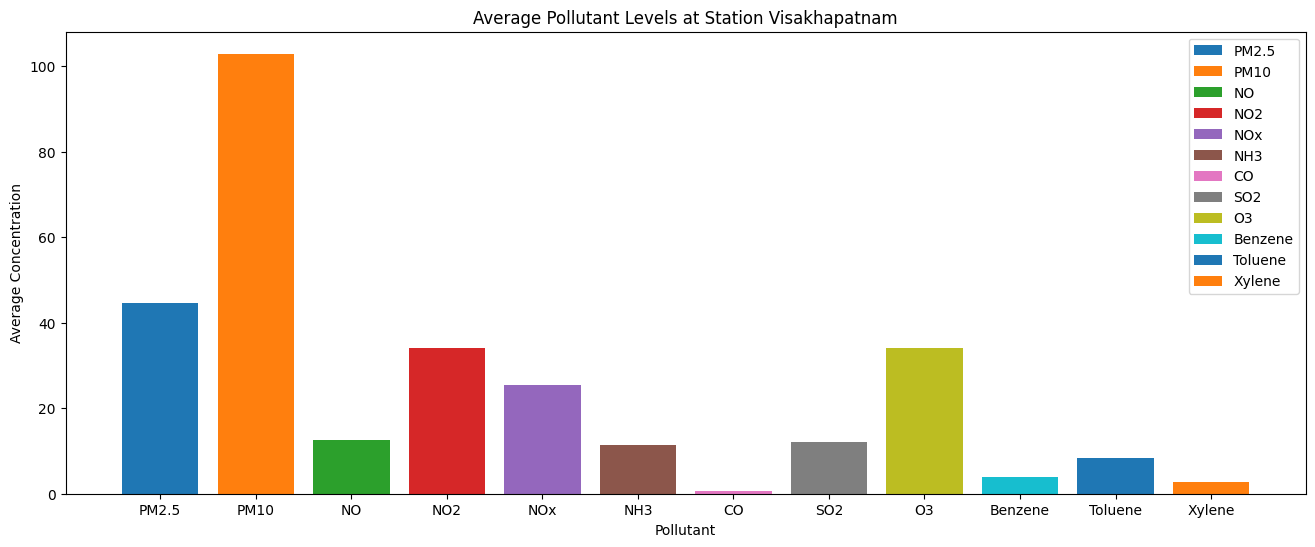

In [54]:
Cities = df['City'].unique()
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

for City in Cities:
    city_data = df[df['City'] == City]
    plt.figure(figsize=(16, 6))
    for pollutant in pollutants:
        plt.bar(pollutant, city_data[pollutant].mean(), label=pollutant)
    plt.title(f'Average Pollutant Levels at Station {City}')
    plt.xlabel('Pollutant')
    plt.ylabel('Average Concentration')
    plt.legend()
    plt.show()

In [55]:
def max_polluted_cities(selected_pollutants):
    x1 = df[[selected_pollutants,'City']].groupby(["City"]).mean().sort_values(by=selected_pollutants,ascending=False).reset_index()
    x1[selected_pollutants] = round(x1[selected_pollutants],2)
    return x1[:6].style.background_gradient(cmap='OrRd')

In [56]:
from IPython.display import display_html

def display_side_by_side(*args):
    # Convert each DataFrame's Styler object to HTML and join them together
    html_str = ''
    for df in args:
        html_str += df._repr_html_()  # Use _repr_html_ to get the HTML representation
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

pm2_5 = max_polluted_cities('PM2.5')
pm10 = max_polluted_cities('PM10')
no = max_polluted_cities('NO')
no2 = max_polluted_cities('NO2')
nox = max_polluted_cities('NOx')
NH3 = max_polluted_cities('NH3')
air_qua = max_polluted_cities('AQI')

# Display the DataFrames side by side
display_side_by_side(pm2_5, pm10, no, no2, nox, NH3, air_qua)

,City,PM2.5
0,Gurugram,117.630000
1,Delhi,117.100000
2,Patna,114.370000
3,Lucknow,105.050000
4,Ahmedabad,92.980000
5,Guwahati,63.860000
,City,PM10
0,Delhi,233.950000
1,Talcher,150.260000
2,Jorapokhar,149.140000


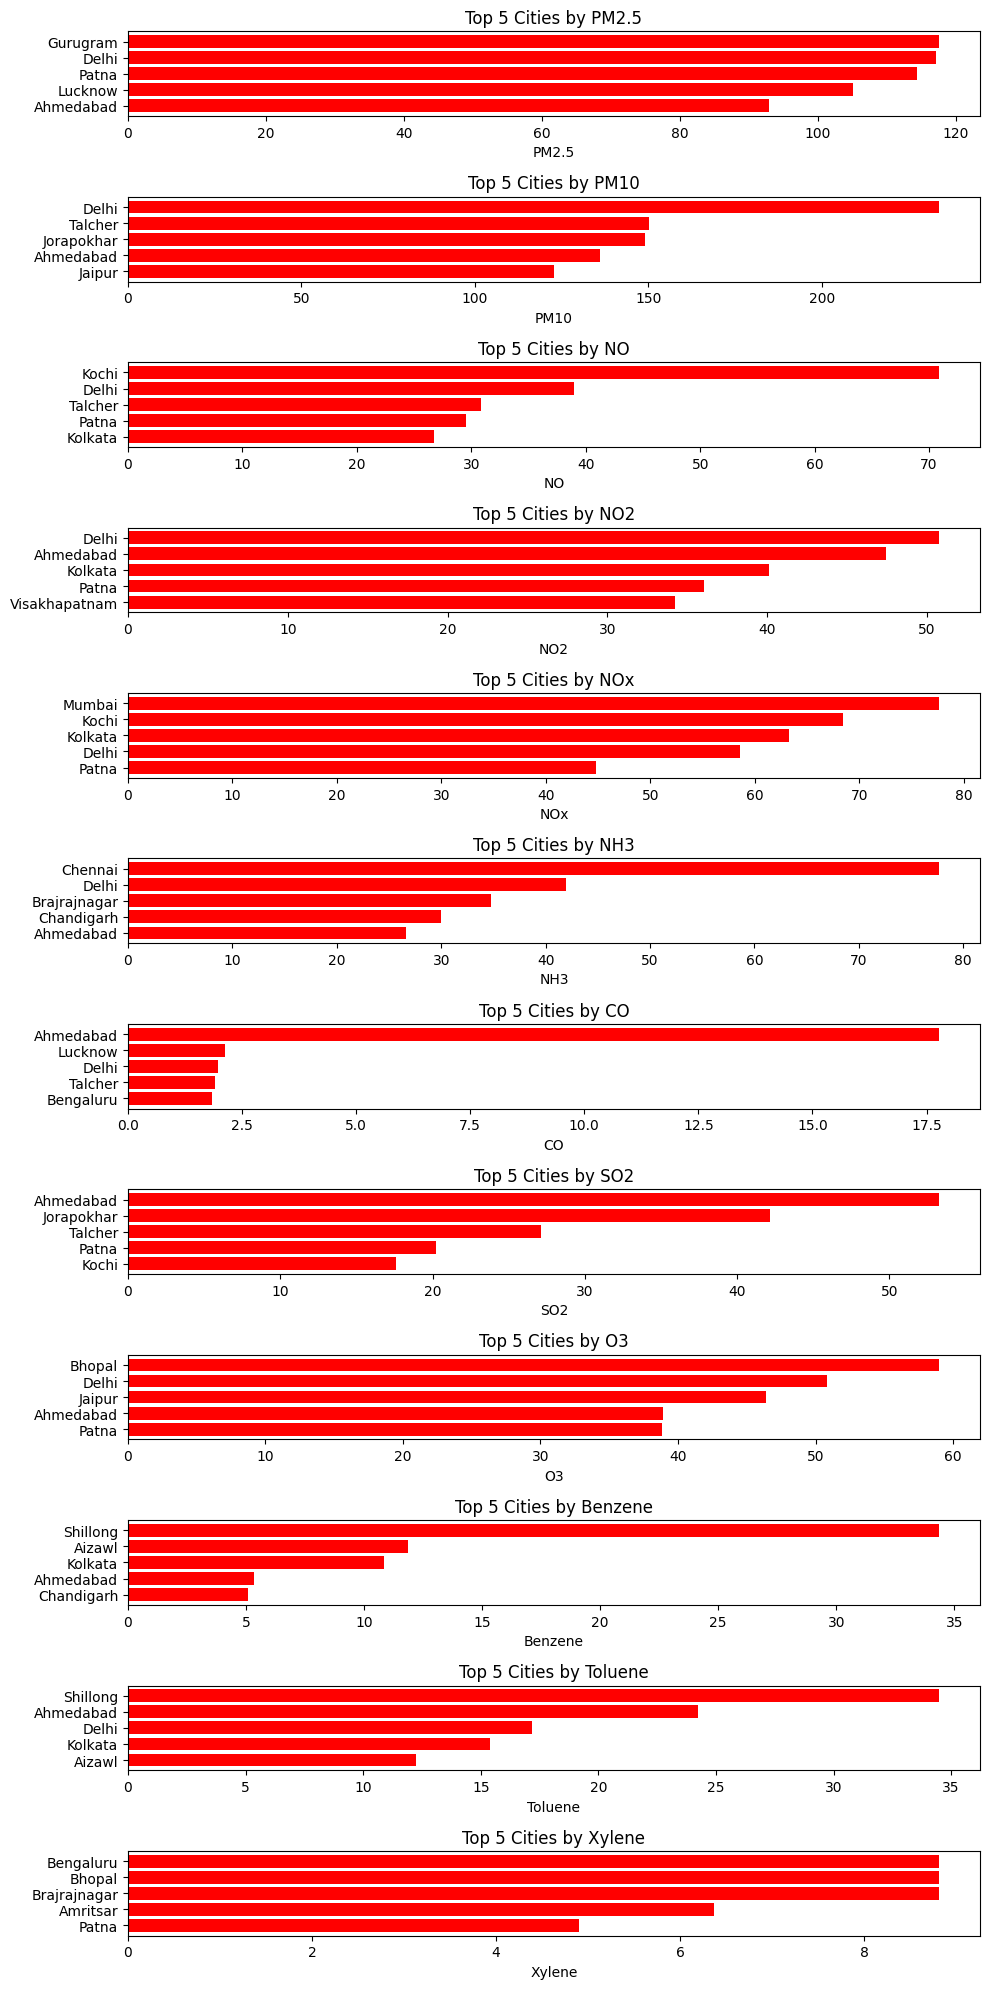

In [57]:
pollutant_columns = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Step 1: Group by station and calculate mean pollutant concentrations
mean_pollutant_by_station = df.groupby('City')[pollutant_columns].mean()

# Step 2: Find the top 5 stations for each pollutant
top_stations = {}
for pollutant in pollutant_columns:
    top_stations[pollutant] = mean_pollutant_by_station[pollutant].sort_values(ascending=False).head(5)

# Step 3: Plotting
fig, axes = plt.subplots(len(pollutant_columns), 1, figsize=(10, 20))

for i, pollutant in enumerate(pollutant_columns):
    axes[i].barh(top_stations[pollutant].index, top_stations[pollutant].values, color='red')
    axes[i].set_title(f'Top 5 Cities by {pollutant}')
    axes[i].set_xlabel(f'{pollutant}')
    axes[i].invert_yaxis()  # Highest values on top

plt.tight_layout()
plt.show()


In [58]:
import plotly.express as px

# Calculate the A verage of each pollutant
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
mean_pollutants = df[pollutants].mean()

# Create the bar chart
fig = px.bar(
    x=pollutants,
    y=mean_pollutants,
    title='Average of Each Pollutant',
    labels={'x': 'Pollutant', 'y': 'Average Concentration'}
)

fig.show()

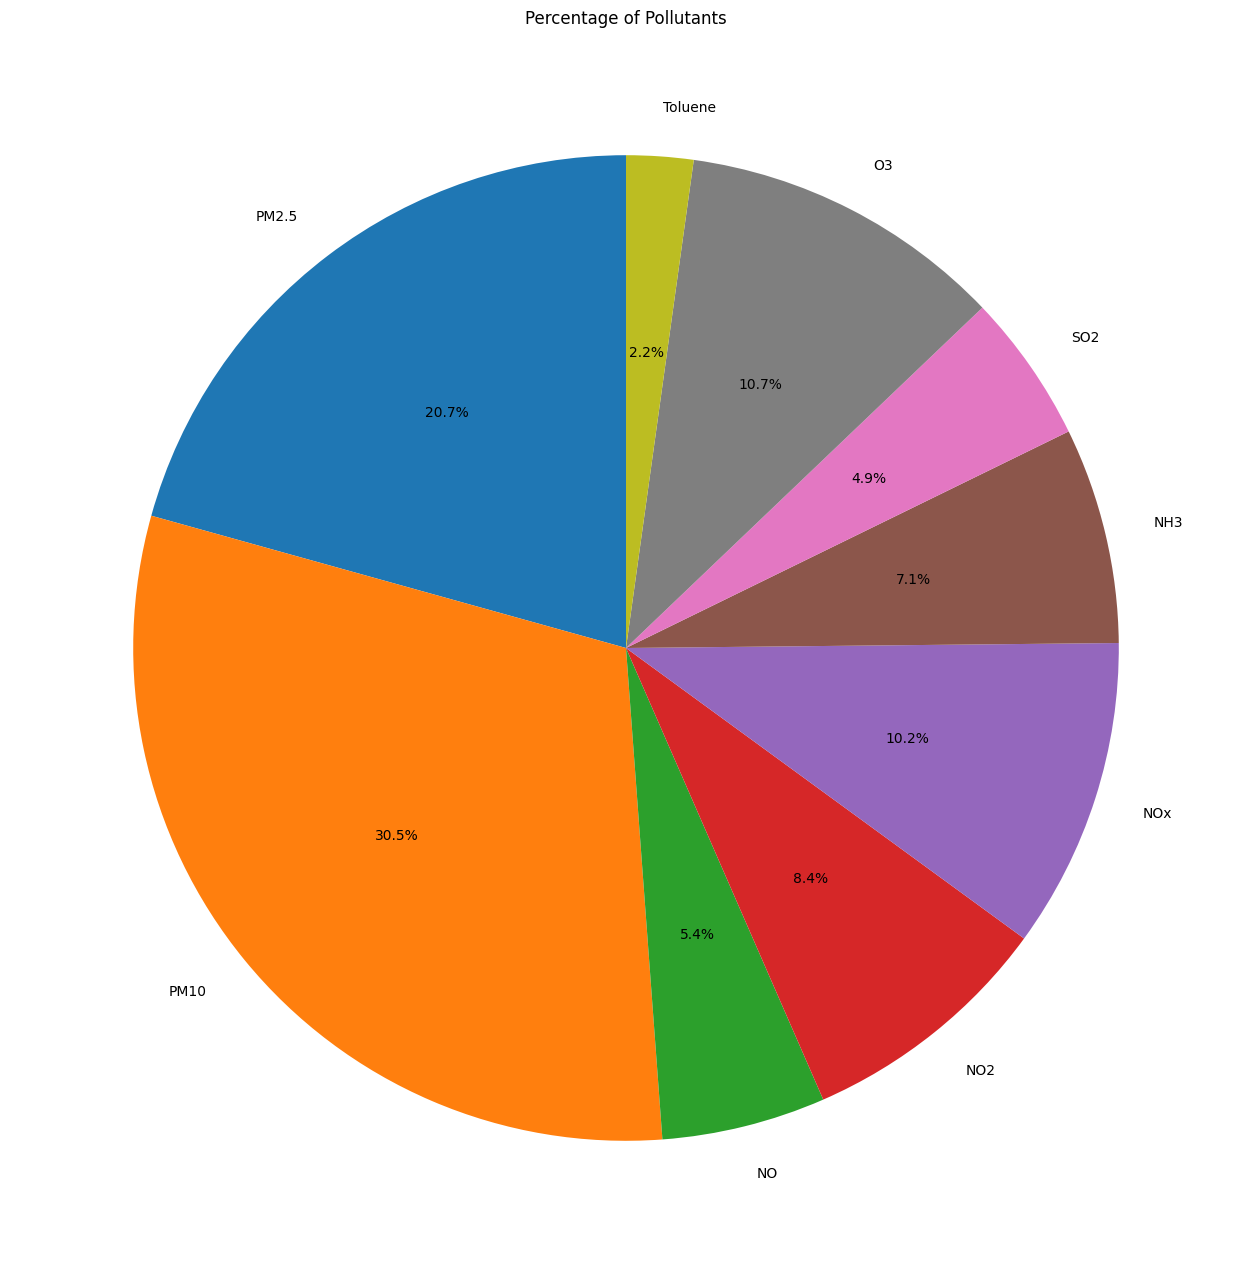

In [59]:
import matplotlib.pyplot as plt

pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','SO2','O3','Toluene']
total_pollutant_concentration = df[pollutants].sum().sum()  # Calculates total concentration across all pollutants

# Calculate percentage for each pollutant
pollutant_percentages = [(df[pollutant].sum() / total_pollutant_concentration) * 100 for pollutant in pollutants]

# Create the pie chart
plt.figure(figsize=(16, 16))  # Adjust figure size if needed
plt.pie(pollutant_percentages, labels=pollutants, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Pollutants')
plt.show()

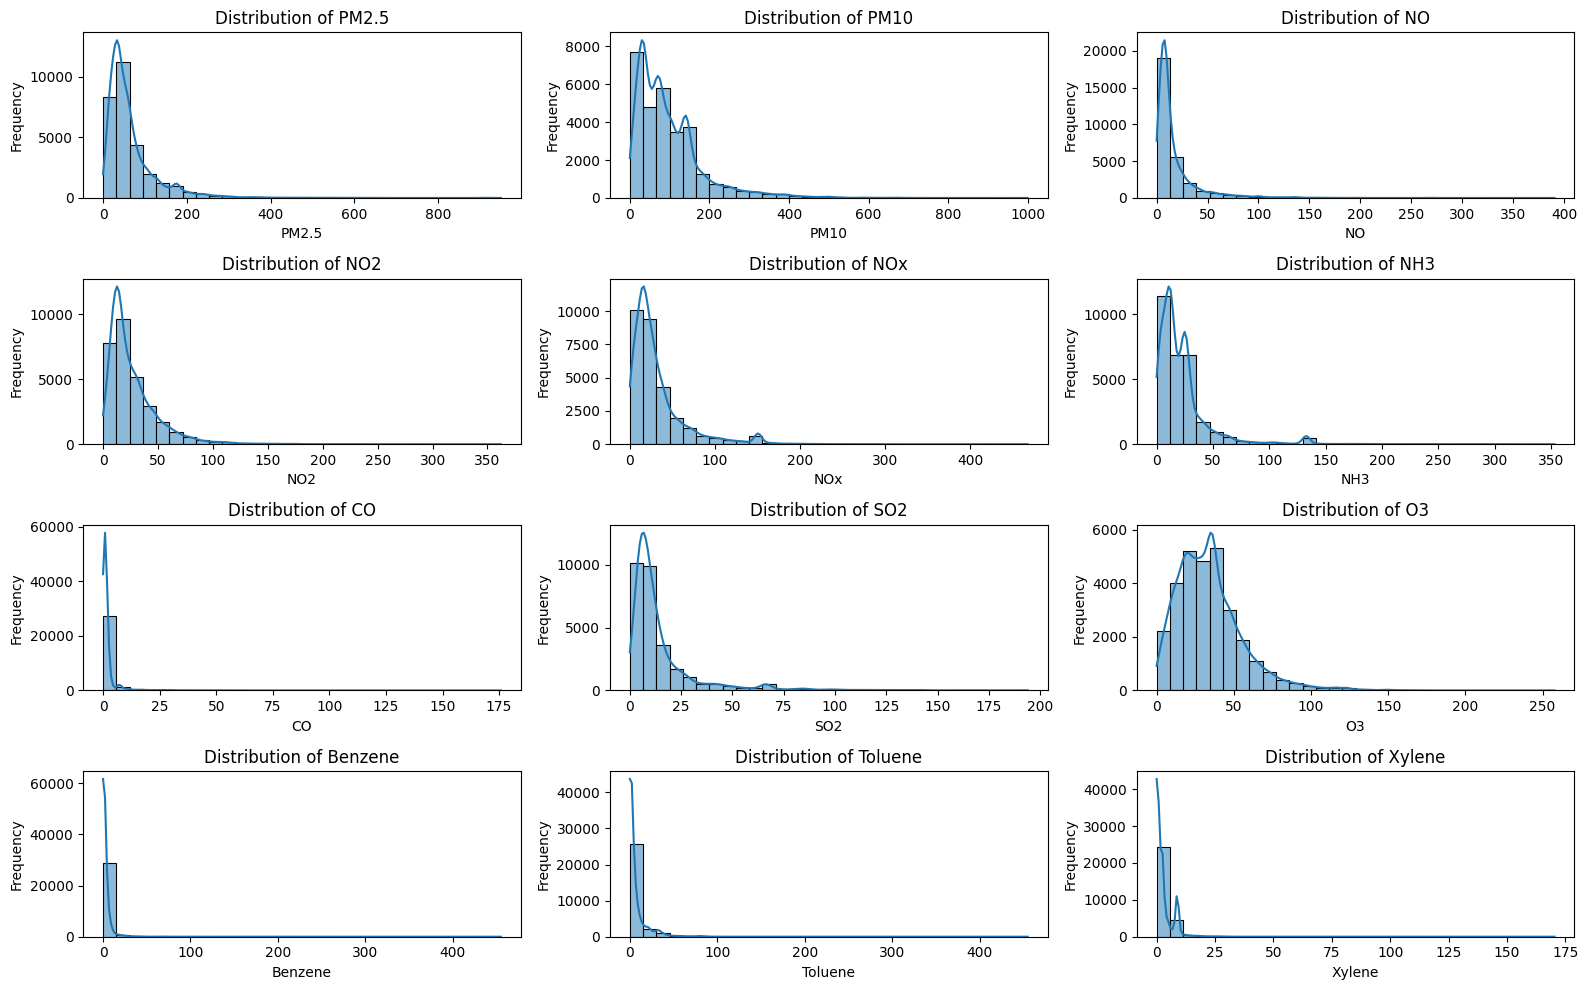

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of key variables (pollutants)
key_variables = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Set the size of the entire figure
plt.figure(figsize=(16, 10))

# Create subplots for each key variable
for i, column in enumerate(key_variables, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns, position i
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


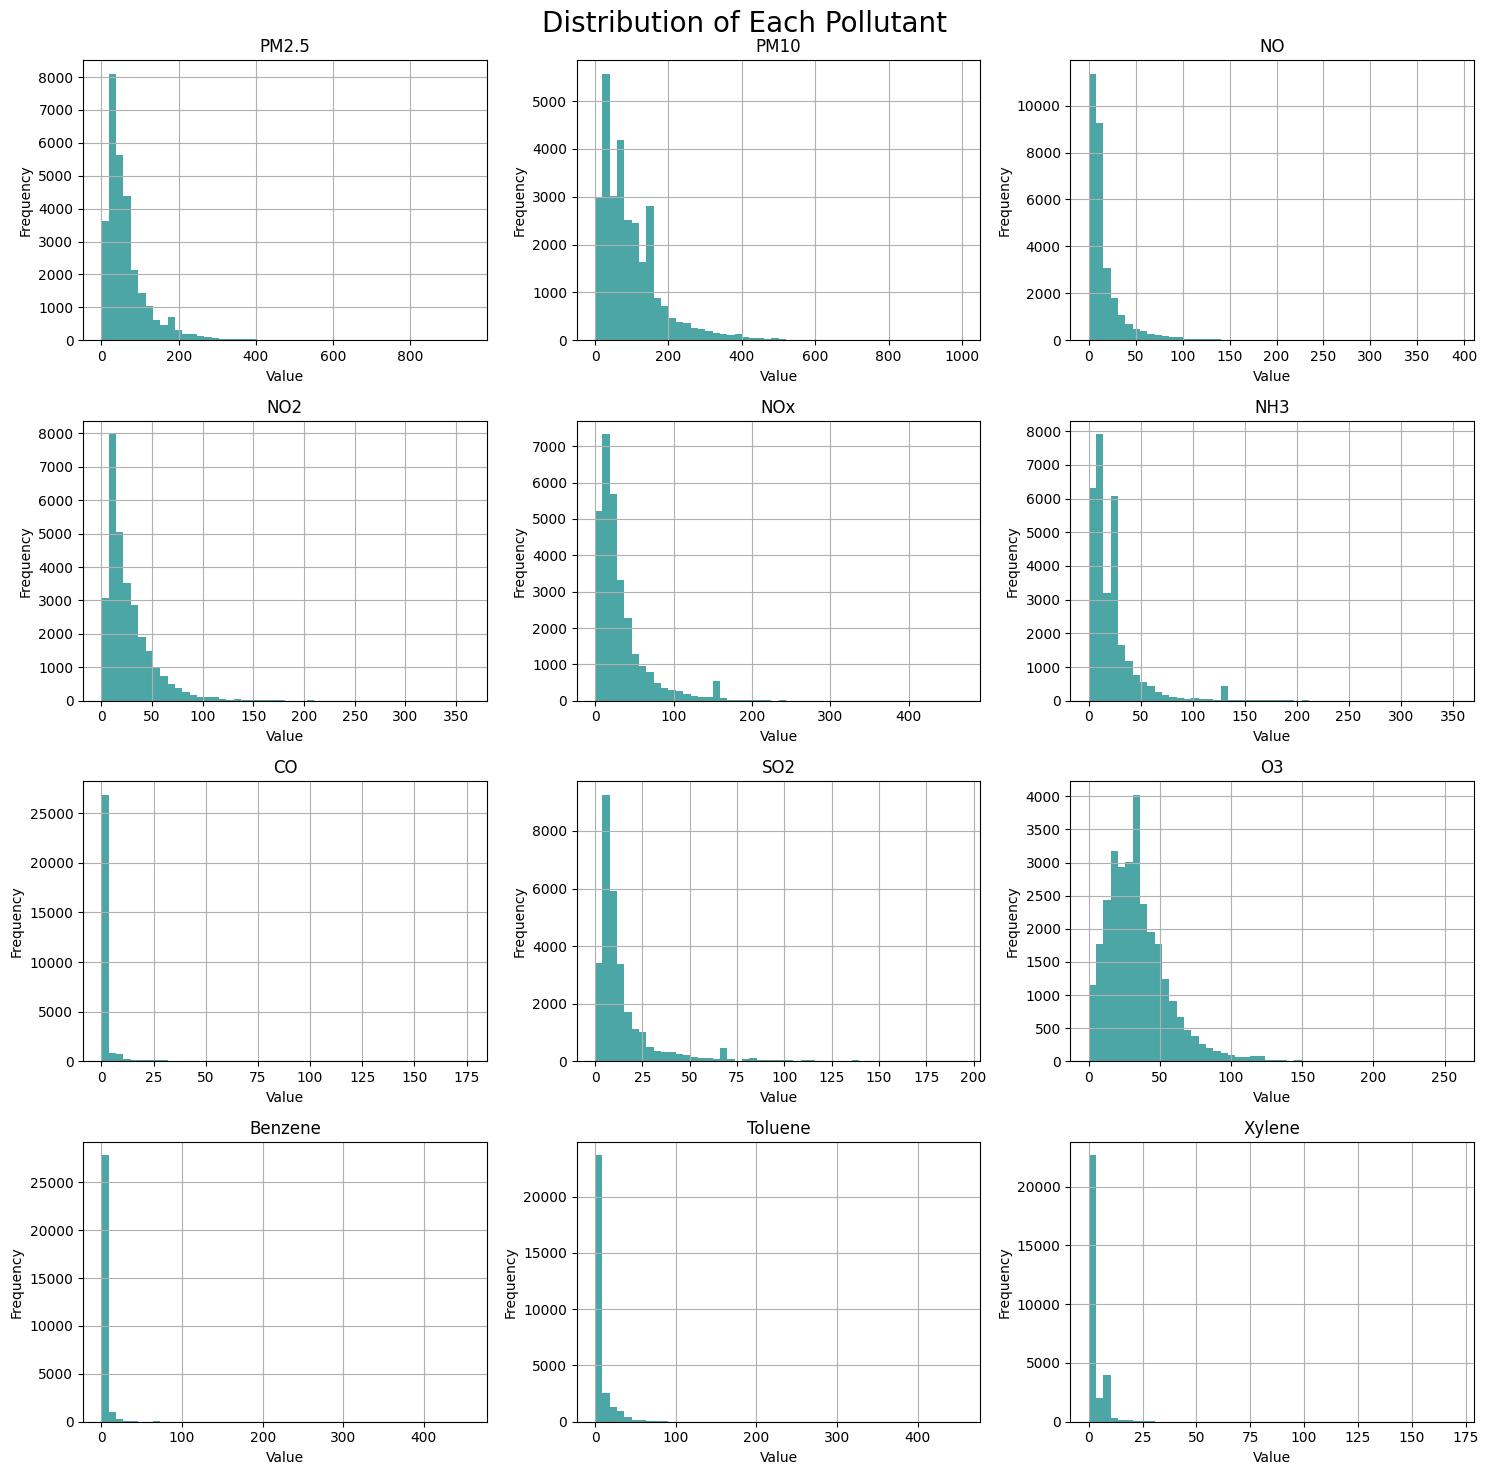

In [61]:
# Select numerical columns for visualization
numerical_columns = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    df[column].hist(bins=50, ax=ax, color='teal', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Distribution of Each Pollutant", fontsize=20)
plt.tight_layout()
plt.show()

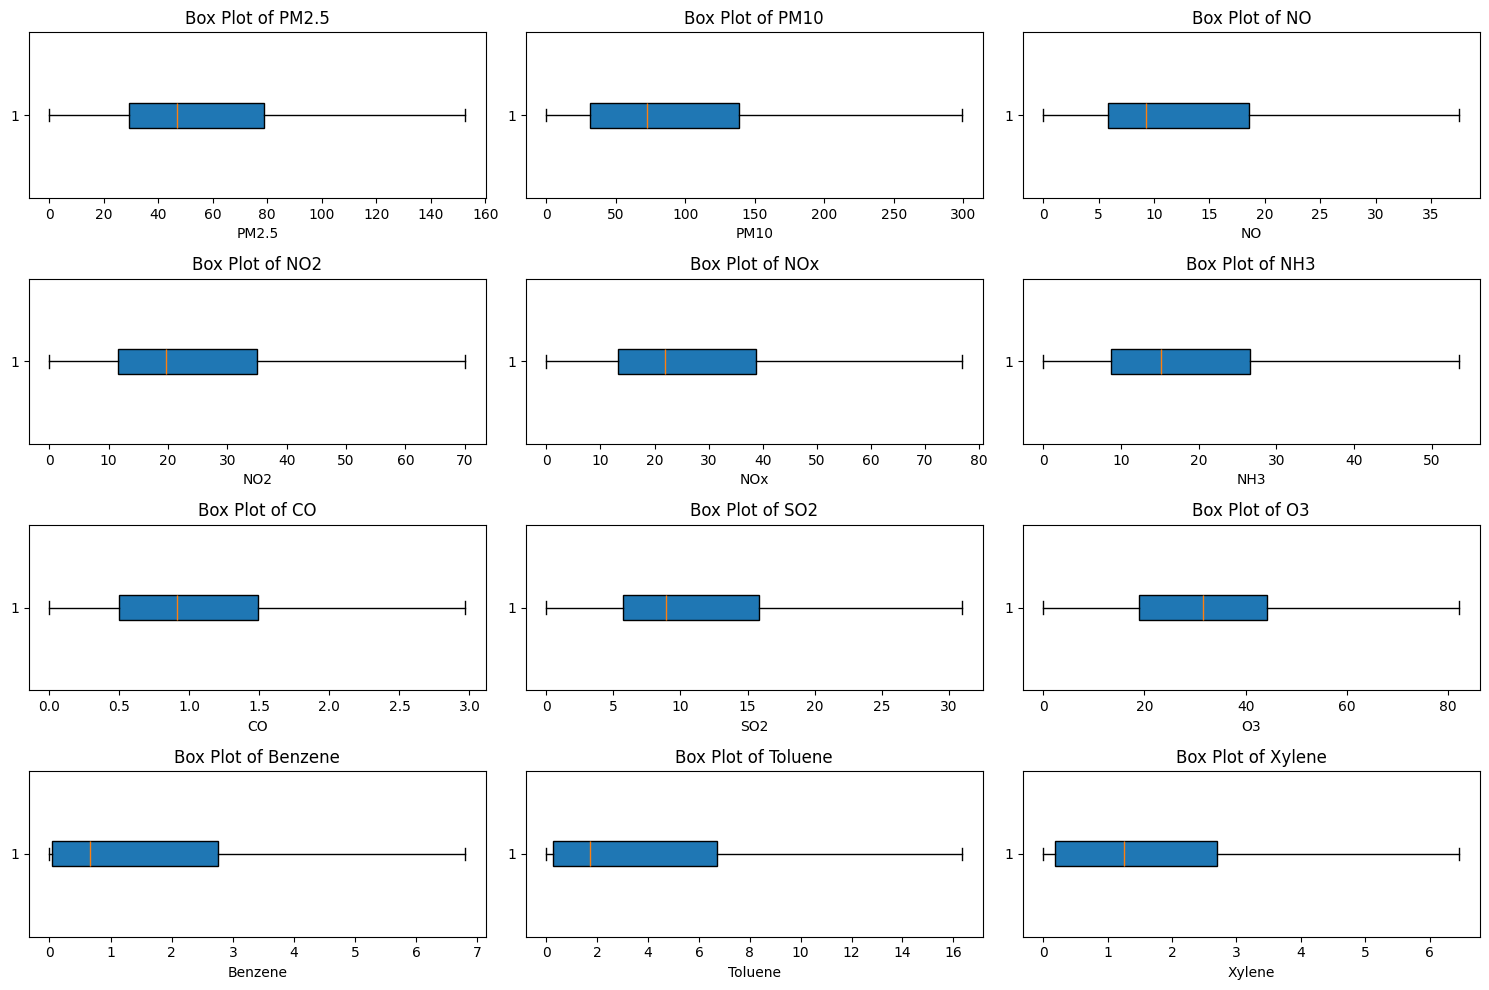

In [62]:
# Define the pollutants to analyze
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

# Create a figure and subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))  # 2 rows, 3 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a box plot for each pollutant in a subplot
for i, pollutant in enumerate(pollutants):
    axes[i].boxplot(df[pollutant], vert=False, patch_artist=True, showfliers=False)
    axes[i].set_title(f'Box Plot of {pollutant}')
    axes[i].set_xlabel(pollutant)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

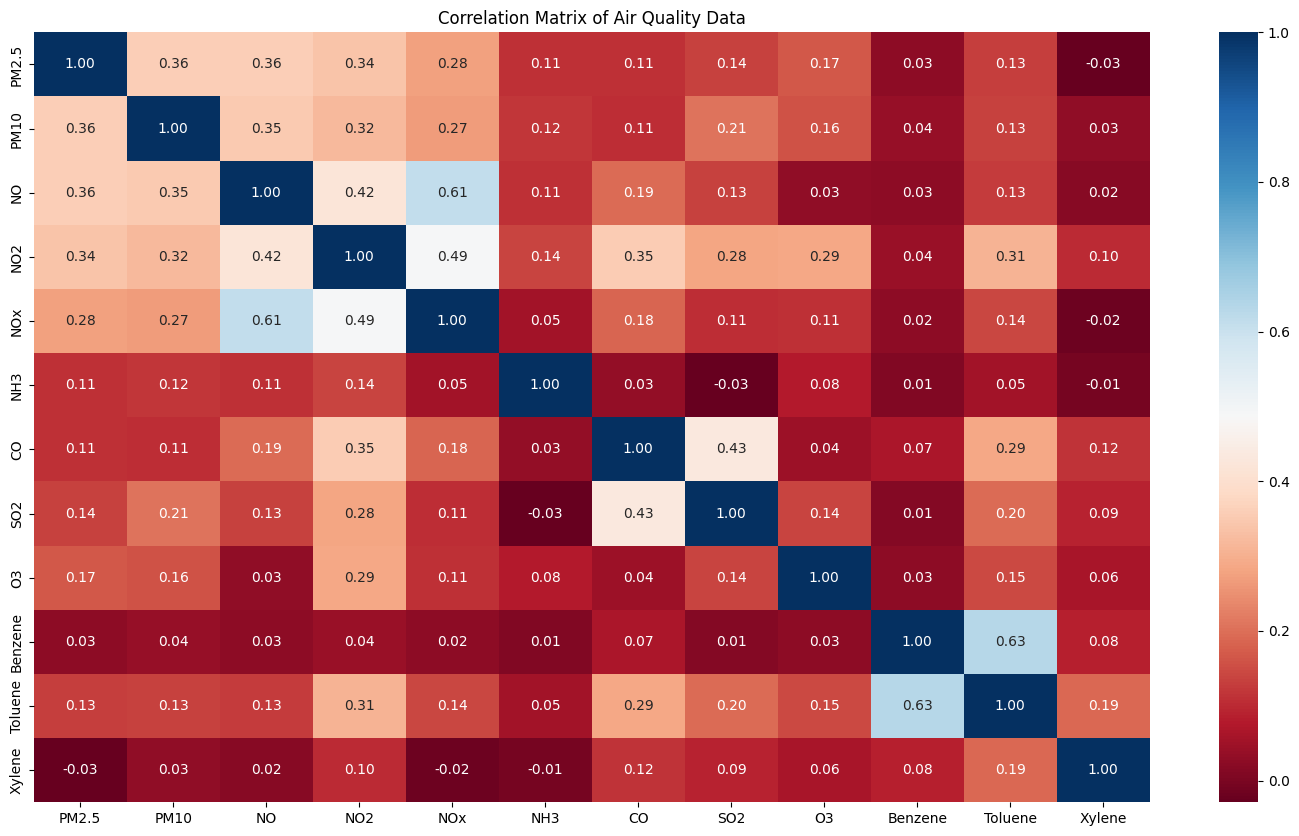

In [63]:
# Select only numeric columns for correlation calculation
pollutants =df[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']]

# Calculate the correlation matrix
correlation_matrix = pollutants.corr()

plt.figure(figsize=(18, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Data')
plt.show()

In [64]:
pollutants.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
PM2.5,1.000000,0.358048,0.358834,0.336787,0.276221,0.110876,0.107734,0.135359,0.166943,0.026834,0.128307,-0.028995
PM10,0.358048,1.000000,0.350411,0.317358,0.267689,0.118249,0.106874,0.207046,0.156062,0.035672,0.133010,0.030741
NO,0.358834,0.350411,1.000000,0.421061,0.612566,0.110603,0.194540,0.133410,0.028060,0.026581,0.126067,0.019073
NO2,0.336787,0.317358,0.421061,1.000000,0.489647,0.137175,0.353373,0.283950,0.286503,0.040492,0.305538,0.102112
NOx,0.276221,0.267689,0.612566,0.489647,1.000000,0.052612,0.184152,0.106738,0.109912,0.023654,0.142145,-0.020897
NH3,0.110876,0.118249,0.110603,0.137175,0.052612,1.000000,0.034871,-0.027456,0.076762,0.007220,0.054119,-0.008799
CO,0.107734,0.106874,0.194540,0.353373,0.184152,0.034871,1.000000,0.430839,0.043637,0.066817,0.286003,0.115370
SO2,0.135359,0.207046,0.133410,0.283950,0.106738,-0.027456,0.430839,1.000000,0.136523,0.013145,0.195815,0.088904
O3,0.166943,0.156062,0.028060,0.286503,0.109912,0.076762,0.043637,0.136523,1.000000,0.026777,0.146520,0.062756
Benzene,0.026834,0.035672,0.026581,0.040492,0.023654,0.007220,0.066817,0.013145,0.026777,1.000000,0.632012,0.084402


In [65]:
import numpy as np
# Select relevant columns for correlation analysis
corr_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
corr_matrix = df[corr_cols].corr()

# Create text annotations for percentages
text_annotations = np.around(corr_matrix.values, decimals=2)
text_annotations = text_annotations.astype(str)

# Creating heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_cols,
                   y=corr_cols,
                   colorscale='Inferno',
                   hoverongaps = False,
                   text=text_annotations,  # Add text annotations
                   texttemplate="%{text}"  # Format text as percentages
                   ))

fig.update_layout(title='Correlation Matrix of Weather Conditions and Pollutants')
fig.show()

In [85]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [67]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y", errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-null  object        
dtypes: datetime64[ns](1), 

In [69]:
df['month'] = df['Date'].dt.month

In [71]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
df['Season'] = df['month'].apply(get_season)

In [72]:
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Season
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,1,Winter
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,1,Winter
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,1,Winter
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,1,Winter
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,1,Winter


In [73]:
# Group by season and calculate average pollutant concentrations
seasonal_avg = df.groupby('Season')[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']].mean().reset_index()

# Melt the DataFrame for visualization
seasonal_avg_melted = pd.melt(seasonal_avg, id_vars=['Season'], var_name='Pollutant', value_name='Average Concentration')

# Create a bar chart to visualize seasonal trends
fig = px.bar(seasonal_avg_melted,
             x='Season',
             y='Average Concentration',
             color='Pollutant',
             title='Average Pollutant Concentrations by Season',
             barmode='group')

fig.show()

In [74]:
import pandas as pd

# 1. Coordinates table
city_coords = pd.DataFrame({
    'City': [
        'Kochi','Bhopal','Lucknow','Kolkata','Guwahati','Amaravati','Aizawl',
        'Thiruvananthapuram','Jaipur','Ernakulam','Bengaluru','Mumbai','Hyderabad',
        'Patna','Talcher','Shillong','Coimbatore','Visakhapatnam','Chennai',
        'Gurugram','Brajrajnagar','Amritsar','Jorapokhar','Delhi','Chandigarh','Ahmedabad'
    ],
    'Latitude': [
        9.9312, 23.2599, 26.8467, 22.5726, 26.1445, 16.5062, 23.7271,
        8.5241, 26.9124, 9.9816, 12.9716, 19.0760, 17.3850,
        25.5941, 20.9485, 25.5788, 11.0168, 17.6868, 13.0827,
        28.4595, 21.8100, 31.6340, 23.7975, 28.7041, 30.7333, 23.0225
    ],
    'Longitude': [
        76.2673, 77.4126, 80.9462, 88.3639, 91.7362, 80.6480, 92.7176,
        76.9366, 75.7873, 76.2999, 77.5946, 72.8777, 78.4867,
        85.1376, 85.1950, 91.8933, 76.9558, 83.2185, 80.2707,
        77.0266, 83.1666, 74.8723, 86.1955, 77.1025, 76.7794, 72.5714
    ]
})

In [75]:
#Merge coordinates with your main df
df_map = df.merge(city_coords, on='City', how='left')

In [76]:
import folium

#Create summarized table per city for popup info
city_summary = df_map.groupby('City').agg({
    'AQI': 'mean',
    'PM2.5': 'mean',
    'PM10': 'mean'
}).reset_index()

city_summary = city_summary.merge(city_coords, on='City', how='left')

#Creating the map
center_lat = city_summary['Latitude'].mean()
center_lon = city_summary['Longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

colors = ['red','blue','green','purple','orange','darkblue',
          'pink','gray','black','lightblue','lightgreen','beige']

#Add markers with HTML popup
for i, row in city_summary.iterrows():

    popup_text = f"""
    <b>{row['City']}</b><br>
    Avg AQI: {row['AQI']:.1f}<br>
    Avg PM2.5: {row['PM2.5']:.1f}<br>
    Avg PM10: {row['PM10']:.1f}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=row['City'],
        popup=popup_text,
        icon=folium.Icon(color=colors[i % len(colors)])
    ).add_to(m)

m

AQI Bucket Distribution

<Axes: title={'center': 'AQI Buckets'}, xlabel='AQI_Bucket'>

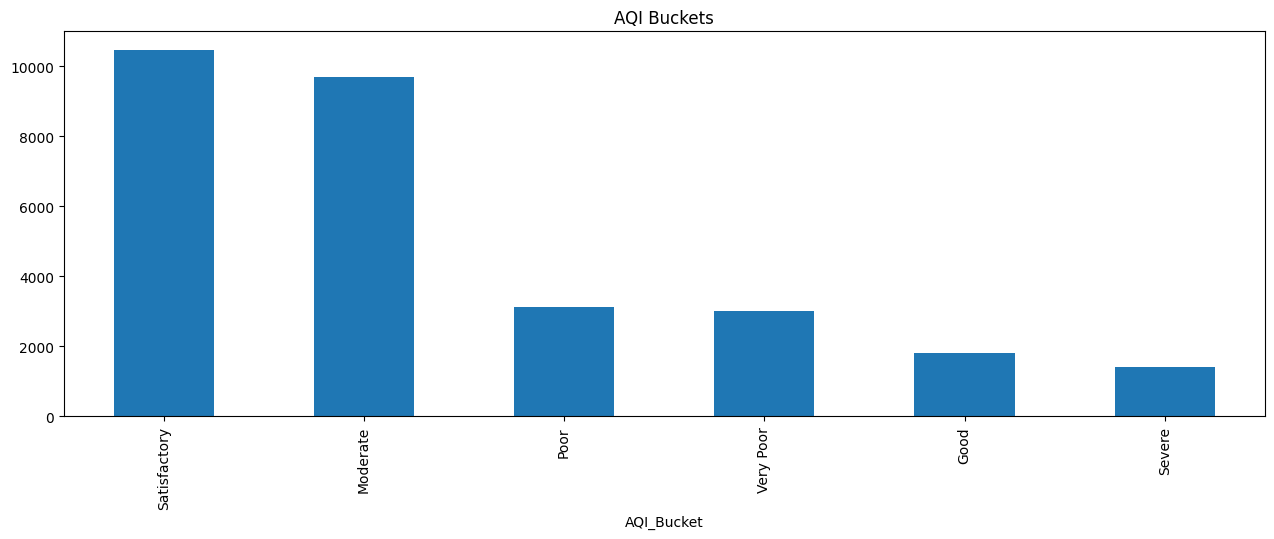

In [77]:
df['AQI_Bucket'].value_counts().plot(kind='bar', figsize=(15.5,5), title='AQI Buckets')

<Axes: ylabel='count'>

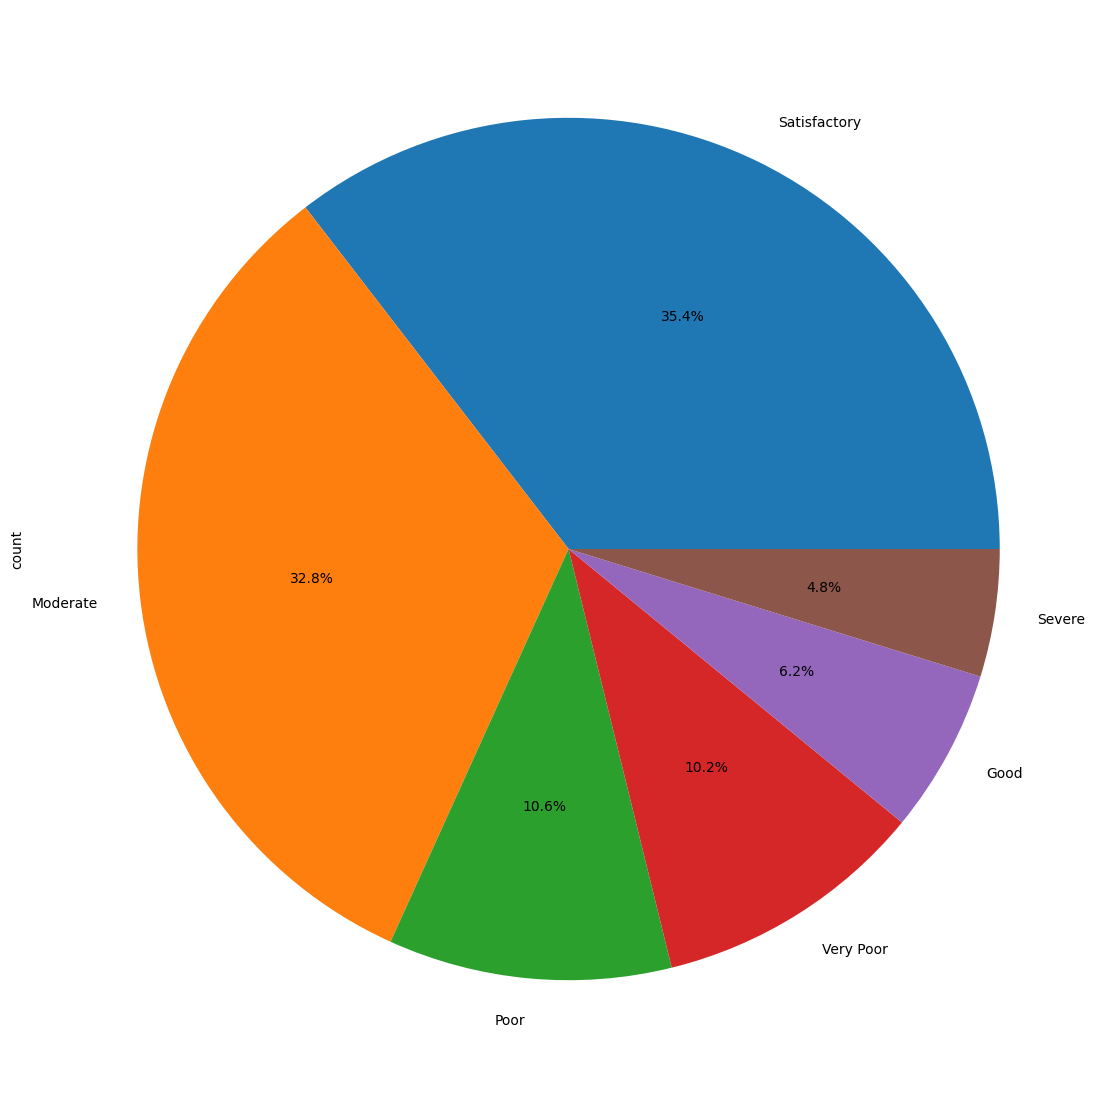

In [78]:
df['AQI_Bucket'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(14,14))


Boxplots for Outlier Detection

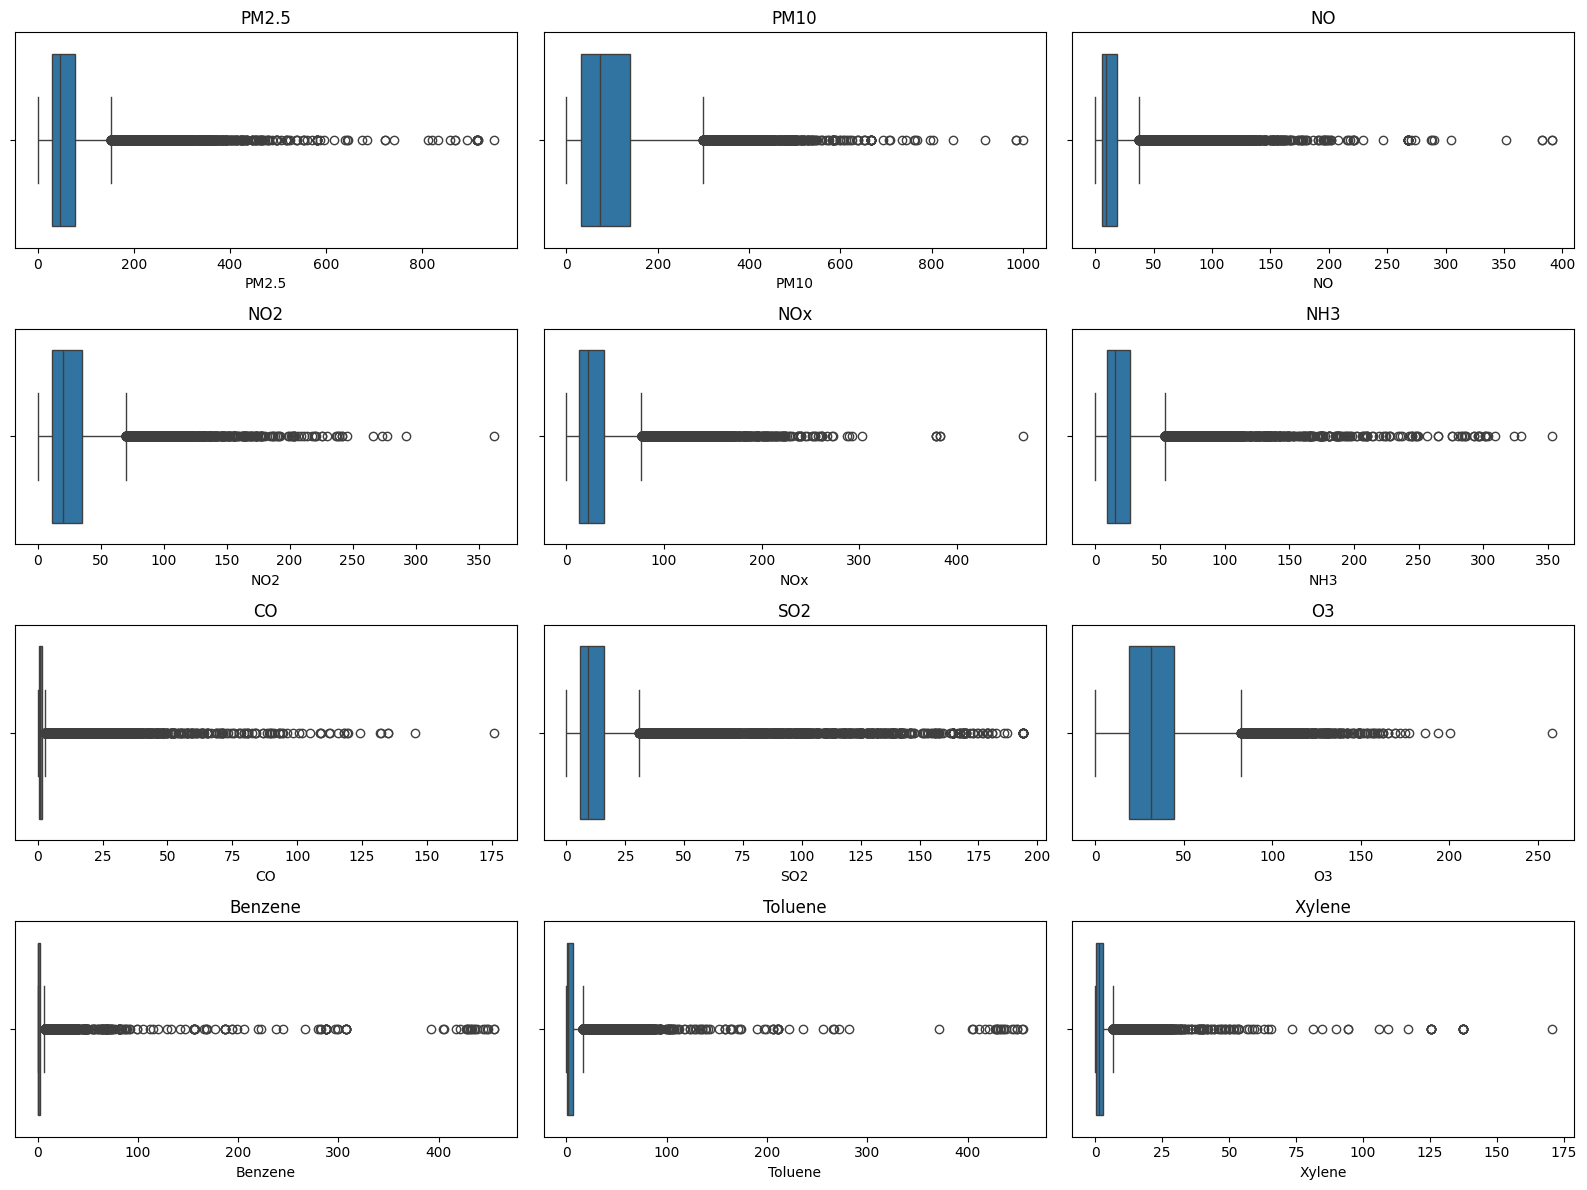

In [79]:
plt.figure(figsize=(16,12))
for i, col in enumerate(pollutants, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Time-based EDA Month

Seasonal Pollutant Levels

In [80]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Season
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,1,Winter
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,1,Winter
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,1,Winter
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,1,Winter
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,1,Winter


<Axes: title={'center': 'Monthly Mean Pollution Levels'}, xlabel='month'>

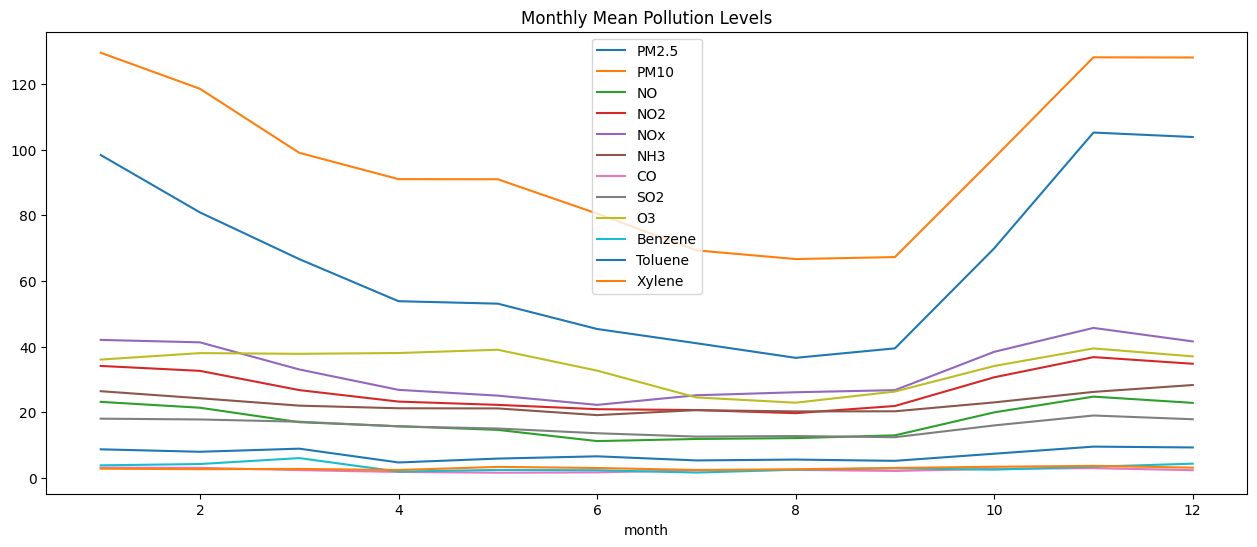

In [89]:
pollu = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']

monthly_mean = df.groupby('month')[pollu].mean()

monthly_mean.plot(figsize=(15.5,6), title='Monthly Mean Pollution Levels')


<Axes: title={'center': 'Pollutant Concentration by Season'}>

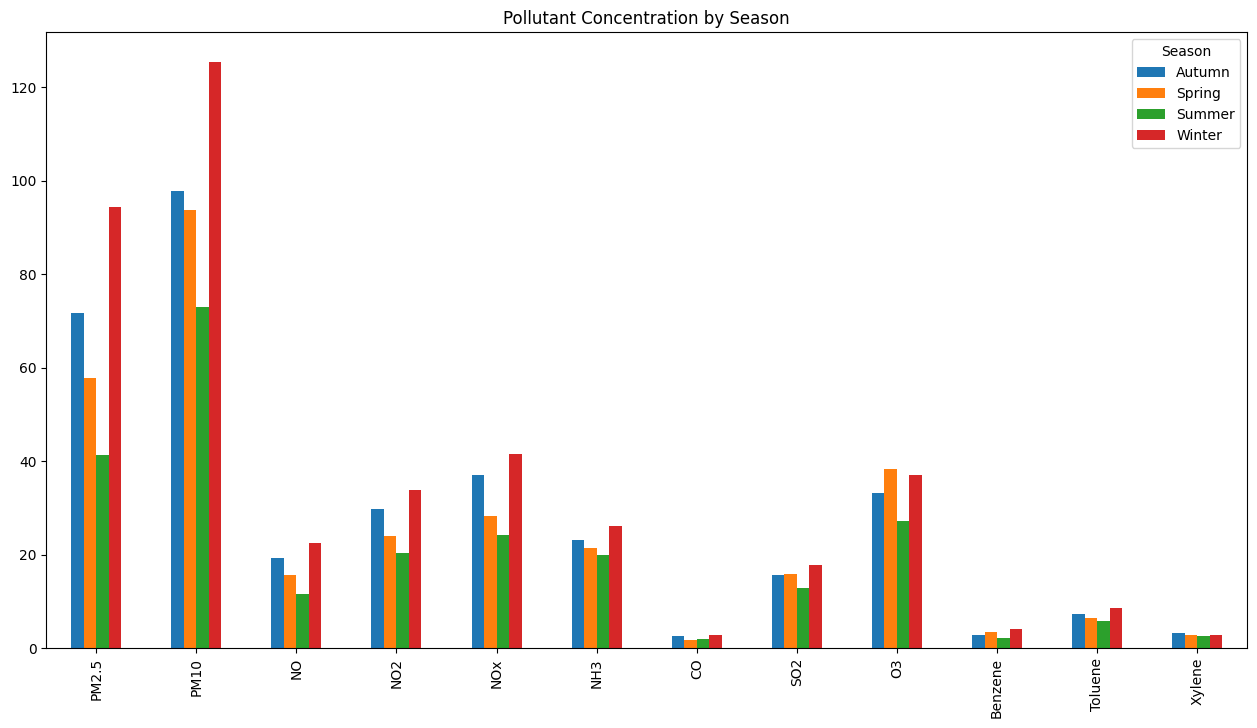

In [92]:
seasonal_mean = df.groupby('Season')[pollu].mean()
seasonal_mean.T.plot(kind='bar', figsize=(15.5,8), title="Pollutant Concentration by Season")

City-wise Pollution Levels

In [90]:
city_avg = df.groupby('City')[pollu + ['AQI']].mean().sort_values(by='AQI', ascending=False)
city_avg.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,,,,,,,,,,,,,
Ahmedabad,92.980224,136.119487,17.946491,47.434689,41.755495,26.640000,17.782997,53.282220,38.936984,5.325326,24.226884,3.832494,420.483823
Delhi,117.101215,233.949716,38.971533,50.769856,58.567023,41.957636,1.976053,16.026446,50.816546,3.544480,17.185042,1.015037,258.632653
Patna,114.374123,23.149957,29.574424,36.033703,44.754785,23.062519,1.432099,20.247788,38.871668,1.509919,9.450108,4.903832,229.198601
Gurugram,117.629315,110.376796,16.952704,22.731513,25.854390,3.187397,1.243288,9.255902,33.288809,1.395783,4.544288,0.405581,227.184038
Lucknow,105.050826,31.580000,15.129124,33.195256,23.391274,21.097710,2.126904,12.032111,37.717332,3.515361,5.496730,0.180000,209.797909


Plot top polluted cities:

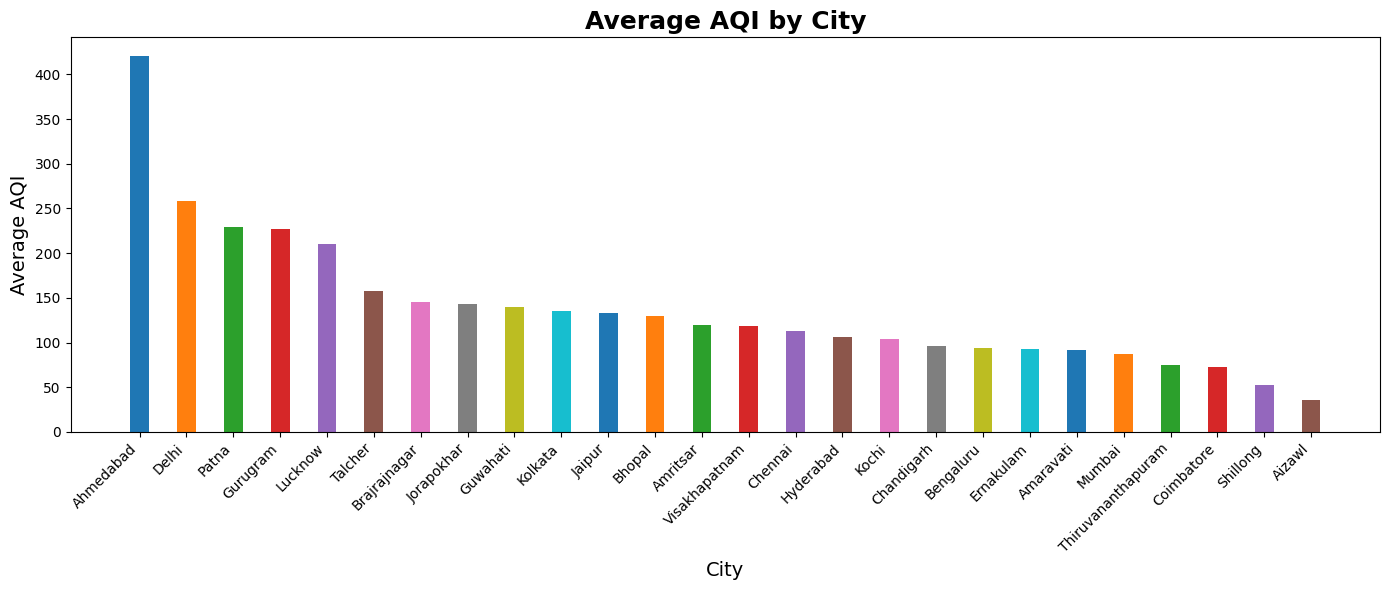

In [91]:
palette = sns.color_palette("tab10", len(city_avg))

plt.figure(figsize=(14,6))

plt.bar(
    range(len(city_avg)),
    city_avg["AQI"],
    color=palette,
    width=0.4
)

plt.xticks(range(len(city_avg)), city_avg.index, rotation=45, ha='right')

plt.title("Average AQI by City", fontsize=18, fontweight='bold')
plt.ylabel("Average AQI", fontsize=14)
plt.xlabel("City", fontsize=14)

plt.tight_layout()
plt.show()


Pollution Comparison Between Cities (Boxplots)

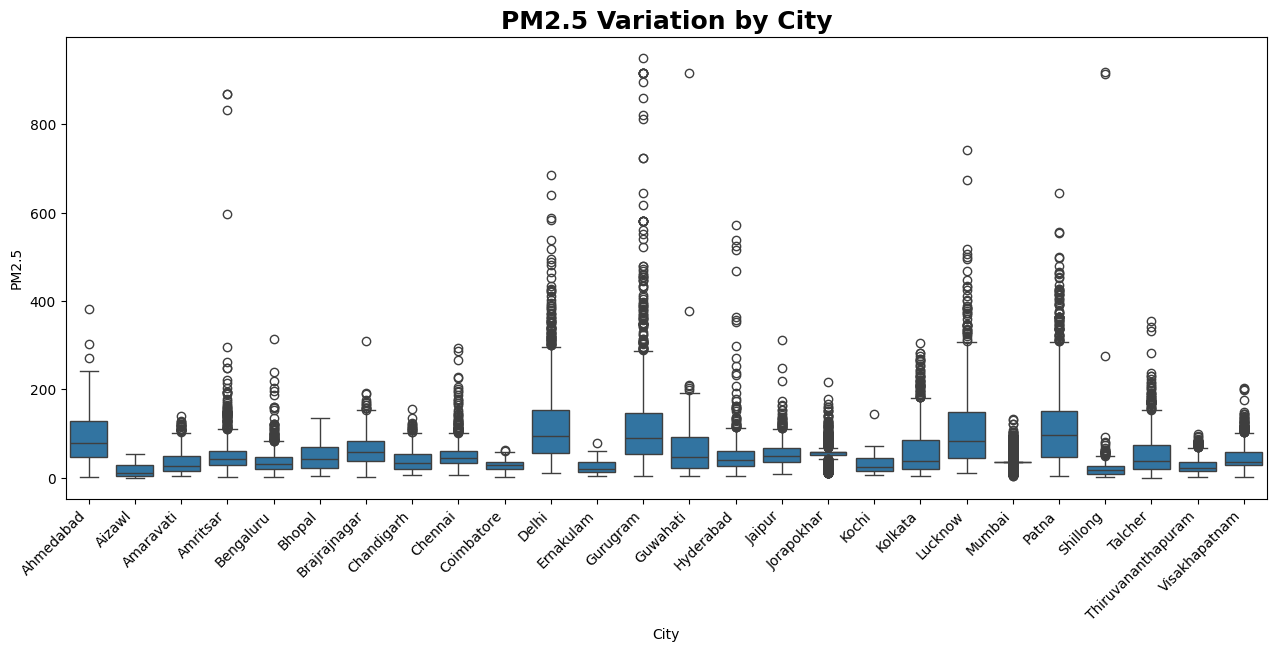

In [87]:
plt.figure(figsize=(15.5,6))
sns.boxplot(data=df, x="City", y="PM2.5")
plt.title("PM2.5 Variation by City", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()
